# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results_l3/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results_l3/1260217713_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/1713568869_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/1527152775_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/1863655430_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/324112183_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/141110631_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.4.json


In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1260217713_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
1:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
3:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
4:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
5:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
7:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
8:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
9:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (Con

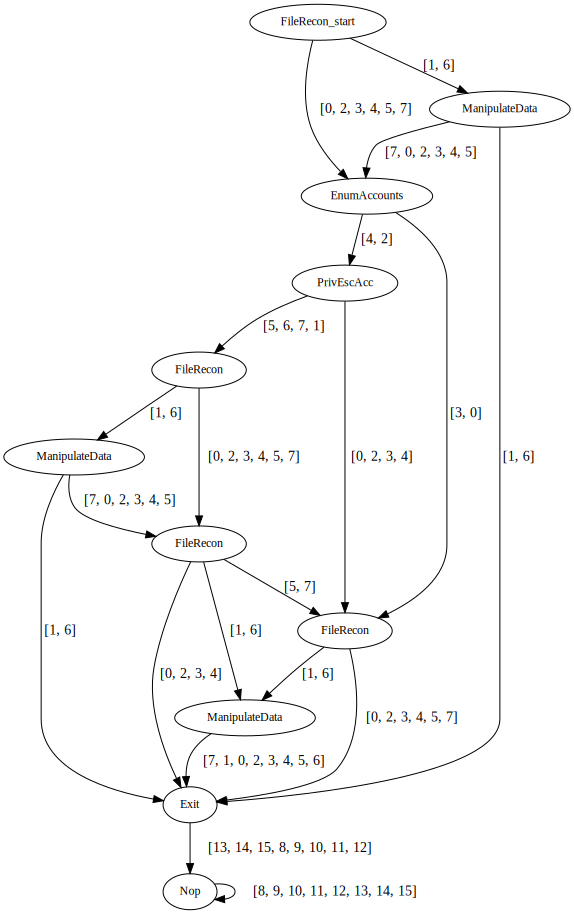

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1713568869_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
1:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
2:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
3:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
4:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
5:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
6:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
7:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
8:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
9:[(AccessPerm, auth), (HostObs, none), (ActionResult

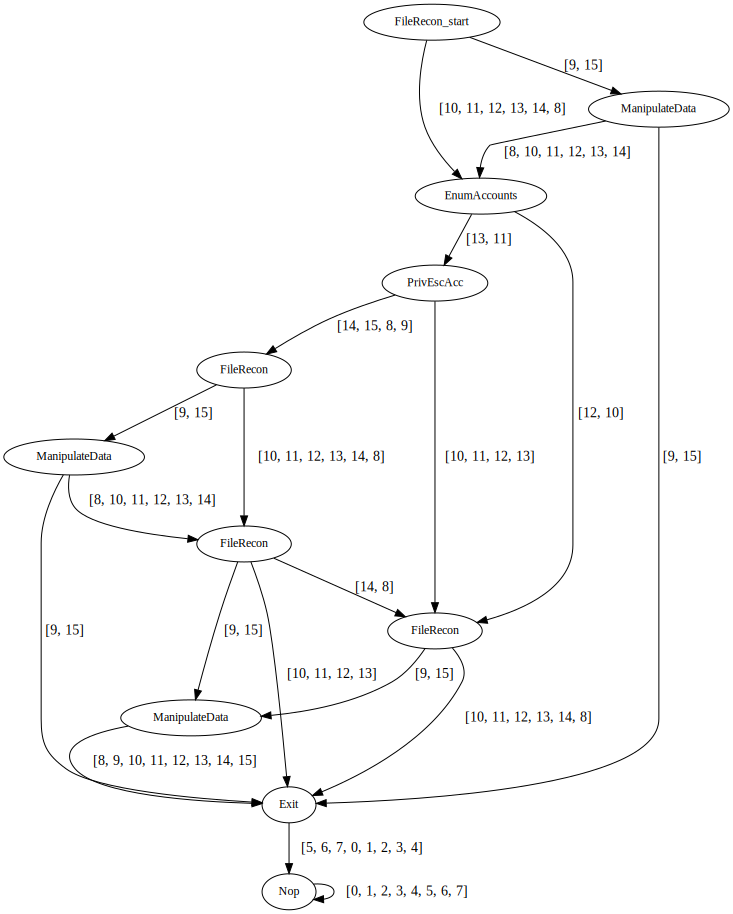

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1527152775_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


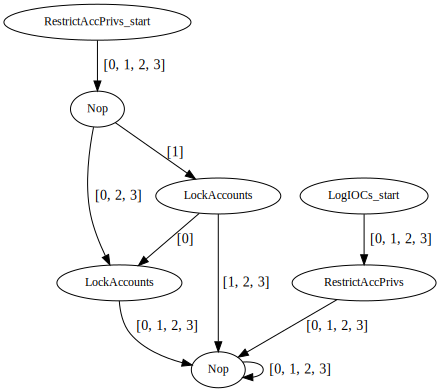

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1863655430_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


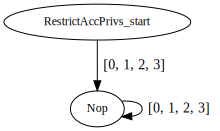

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/324112183_attl2_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, none)]
1:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, perms_change)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
3:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, none)]
4:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
5:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, perms_change)]
6:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active), (DefenseObs, acc_policy_change)]
7:[(AccessPerm, denied), (HostObs, user_files), (ActionResu

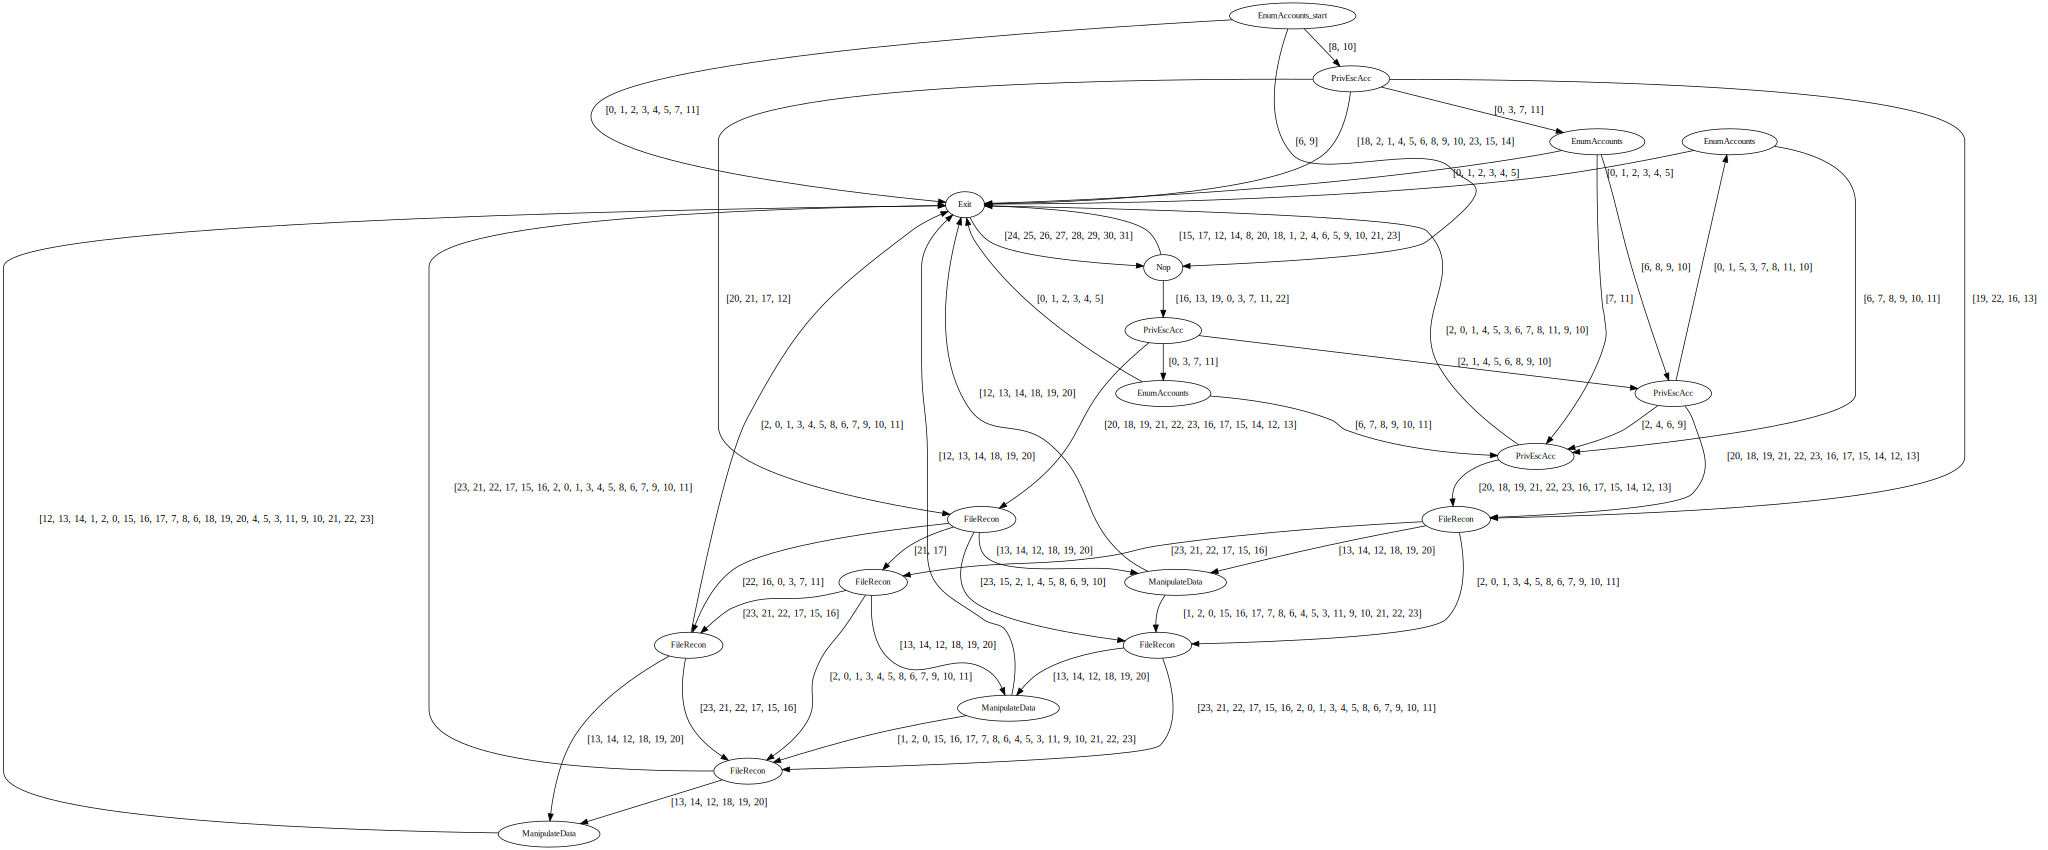

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/141110631_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


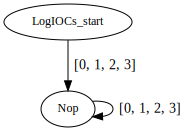

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.4.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                             none
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

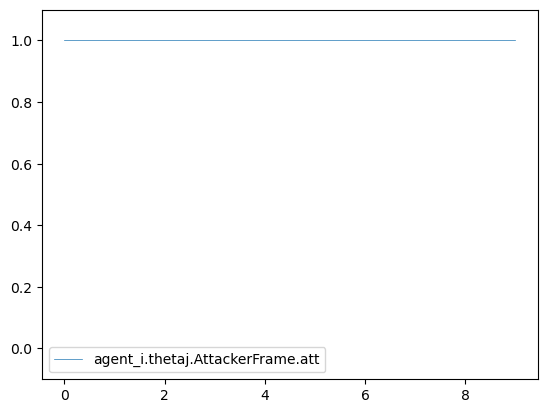

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.904762                        0.095238   
3                         0.904762                        0.095238   
4                         0.904762                        0.095238   
5                         0.904762                        0.095238   
6                         0.904762                        0.095238   
7                         0.904762                        0.095238   
8                         0.904762                        0.095238   
9                         0.904762                        0.095238   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                         none   
7                            auth                         none   
8                          denied                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

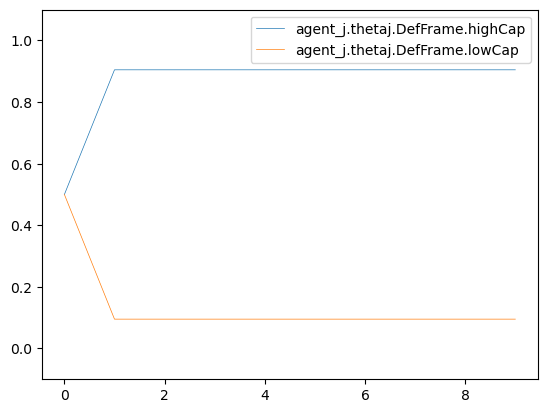

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs   EnumAccounts
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

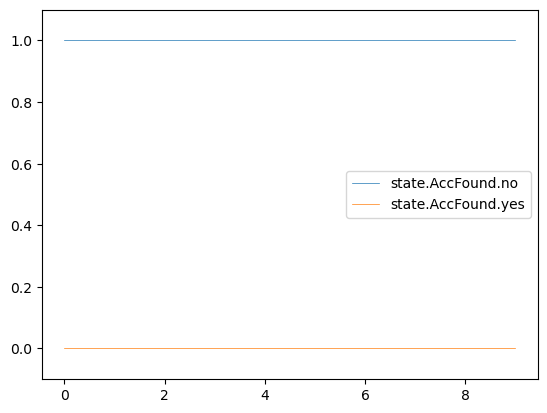

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0        LogIOCs   EnumAccounts   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

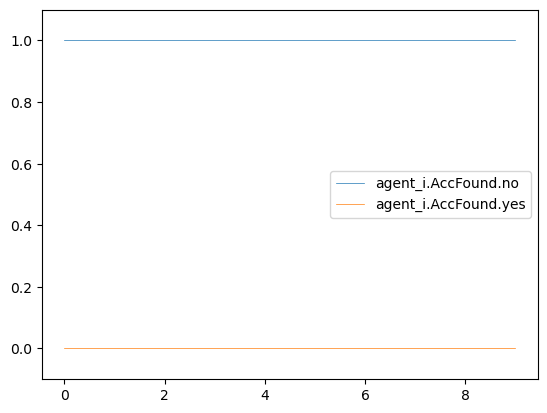

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000   EnumAccounts        LogIOCs   
1             0.943548              0.056452           Exit            Nop   
2             0.943548              0.056452            Nop            Nop   
3             0.943548              0.056452            Nop            Nop   
4             0.943548              0.056452            Nop            Nop   
5             0.943548              0.056452            Nop            Nop   
6             0.943548              0.056452            Nop            Nop   
7             0.943548              0.056452            Nop            Nop   
8             0.943548              0.056452            Nop            Nop   
9             0.943548              0.056452            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                         none   
7                            auth                         none   
8                          denied                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

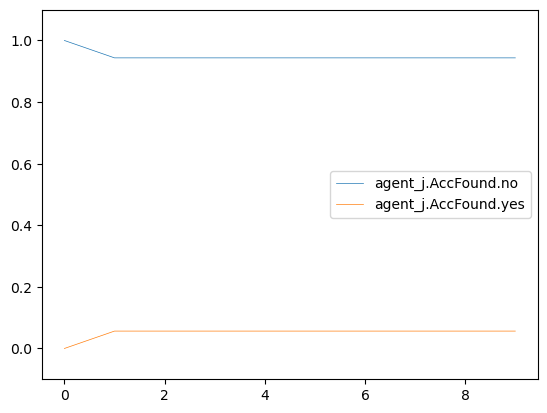

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs   EnumAccounts
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

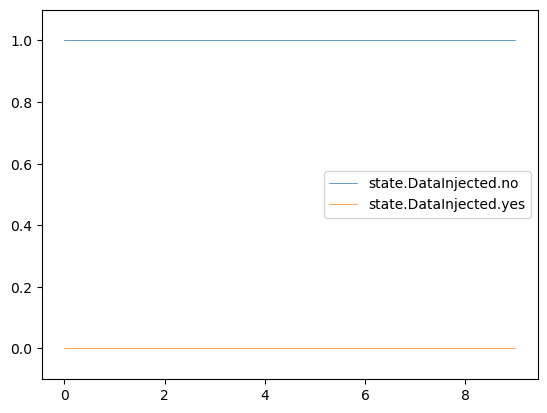

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

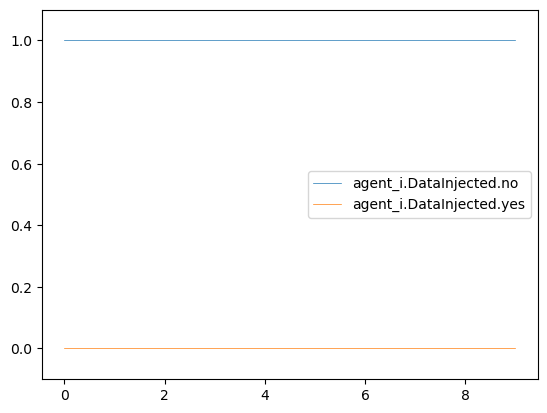

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                            auth                   user_files   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                         none   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

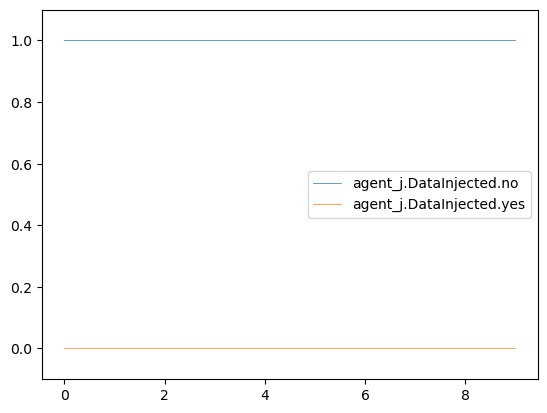

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs   EnumAccounts
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

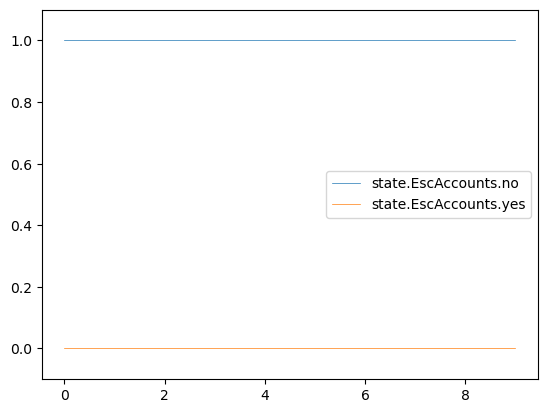

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

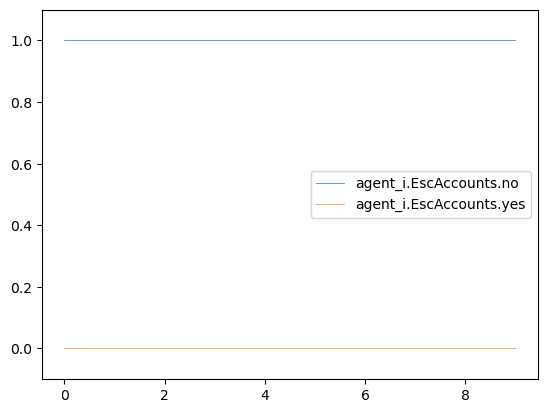

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194           Exit   
2                0.725806                 0.274194            Nop   
3                0.725806                 0.274194            Nop   
4                0.725806                 0.274194            Nop   
5                0.725806                 0.274194            Nop   
6                0.725806                 0.274194            Nop   
7                0.725806                 0.274194            Nop   
8                0.725806                 0.274194            Nop   
9                0.725806                 0.274194            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                            auth                   user_files   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                         none   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

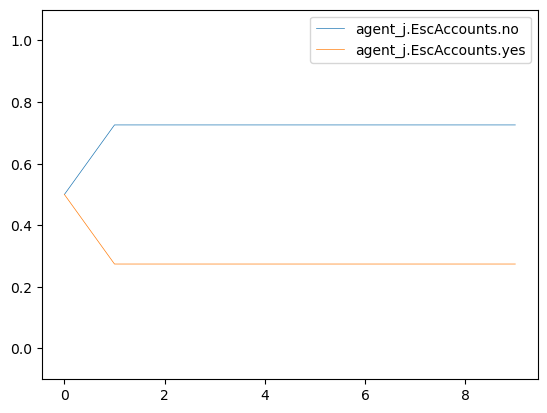

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs   EnumAccounts  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

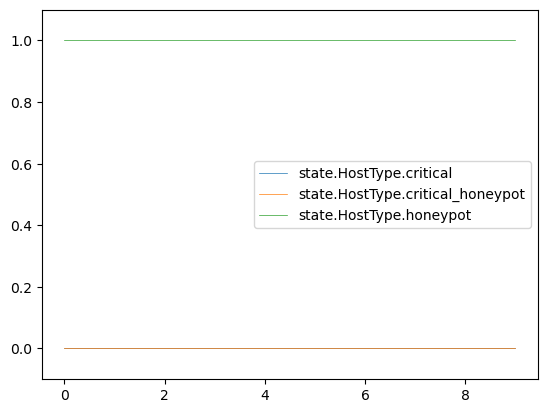

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs   EnumAccounts   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

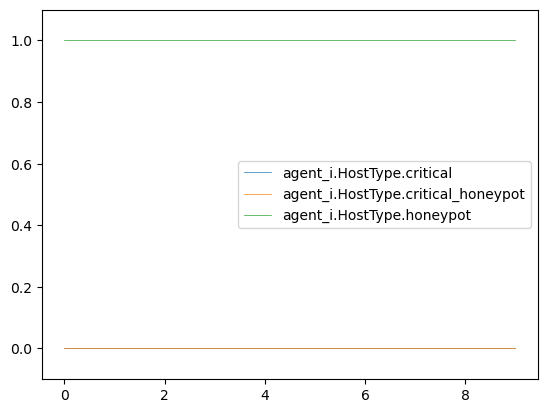

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.0   EnumAccounts        LogIOCs   
1                        0.0           Exit            Nop   
2                        0.0            Nop            Nop   
3                        0.0            Nop            Nop   
4                        0.0            Nop            Nop   
5                        0.0            Nop            Nop   
6                        0.0            Nop            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                         none   
7                            auth                         none   
8                          denied                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

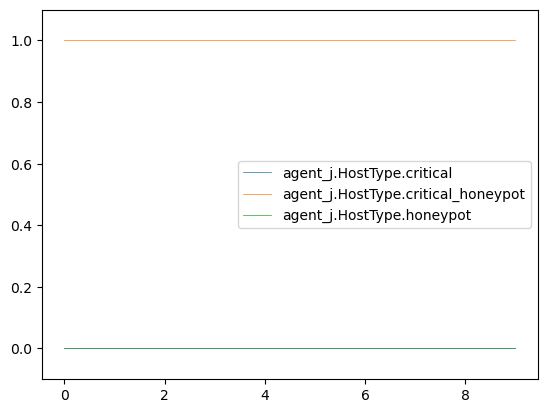

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs   EnumAccounts
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

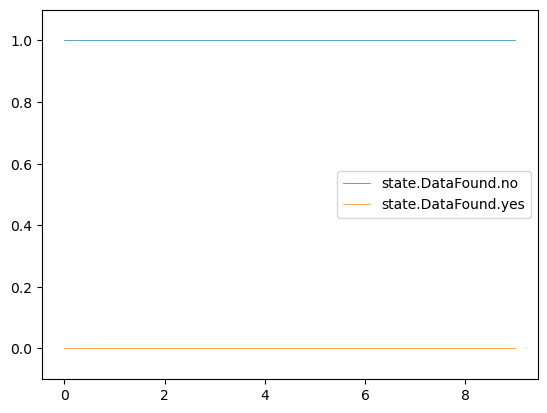

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs   EnumAccounts   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

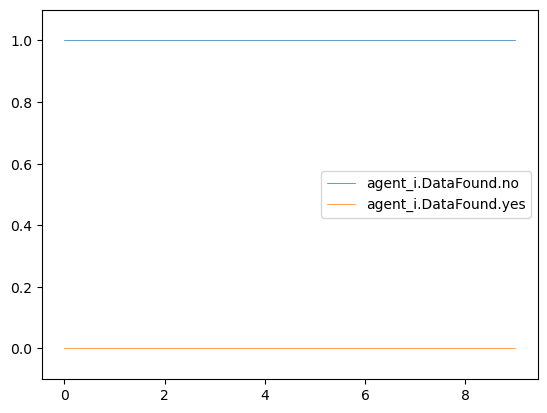

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0                   1.0                    0.0   EnumAccounts        LogIOCs   
1                   1.0                    0.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                         none   
7                            auth                         none   
8                          denied                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

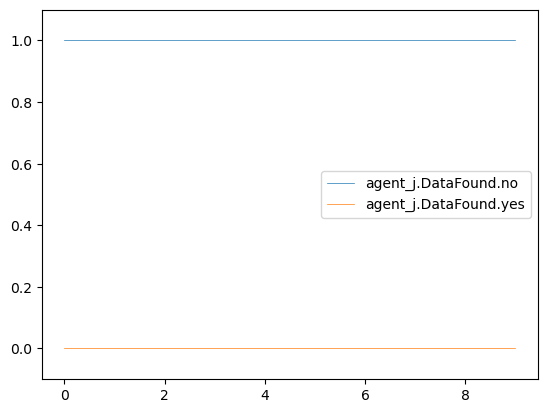

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

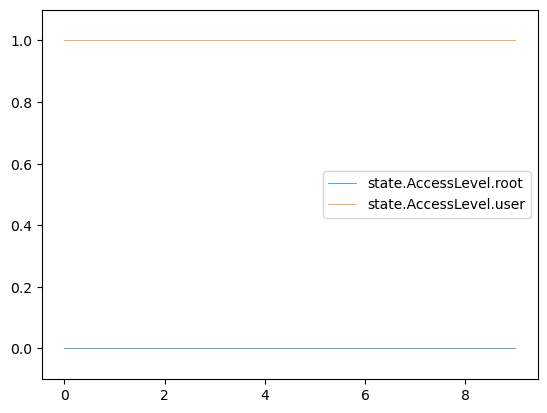

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

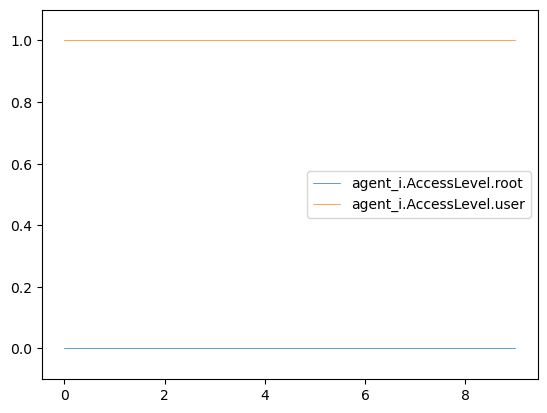

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                            auth                   user_files   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                         none   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

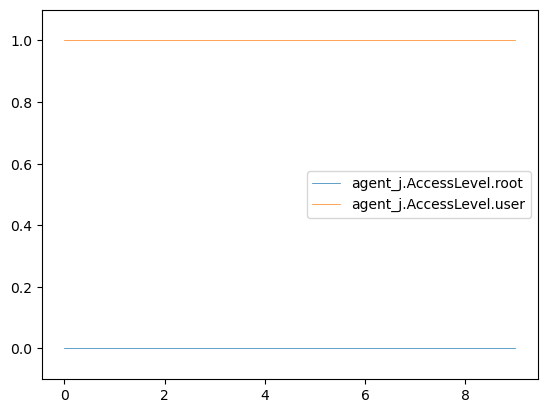

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   0.0                   1.0        LogIOCs   EnumAccounts
1                   0.0                   1.0            Nop           Exit
2                   0.0                   1.0            Nop            Nop
3                   0.0                   1.0            Nop            Nop
4                   0.0                   1.0            Nop            Nop
5                   0.0                   1.0            Nop            Nop
6                   0.0                   1.0            Nop            Nop
7                   0.0                   1.0            Nop            Nop
8                   0.0                   1.0            Nop            Nop
9                   0.0                   1.0            Nop            Nop

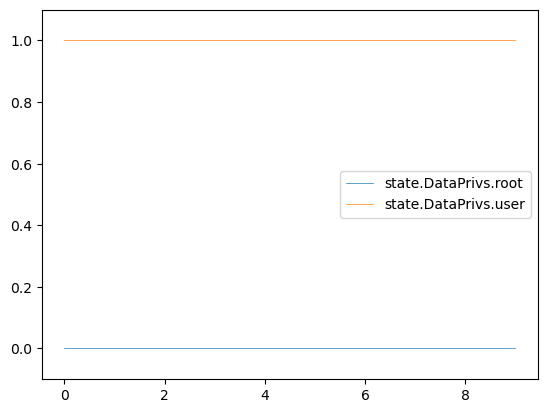

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

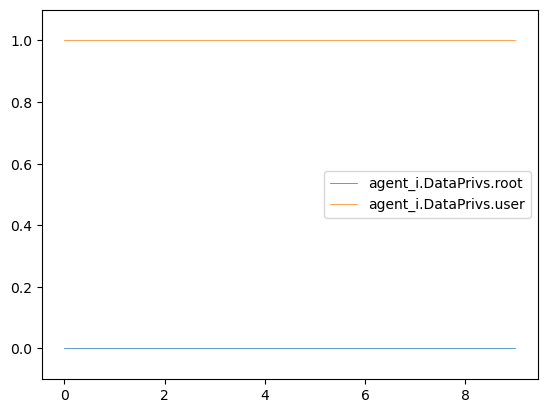

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.571429                0.428571           Exit   
2                1.000000                0.000000            Nop   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                            auth                   user_files   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                         none   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

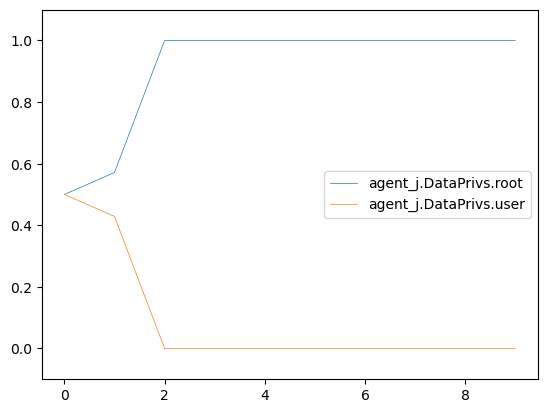

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs   EnumAccounts
1                  0.0                   1.0            Nop           Exit
2                  0.0                   1.0            Nop            Nop
3                  0.0                   1.0            Nop            Nop
4                  0.0                   1.0            Nop            Nop
5                  0.0                   1.0            Nop            Nop
6                  0.0                   1.0            Nop            Nop
7                  0.0                   1.0            Nop            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

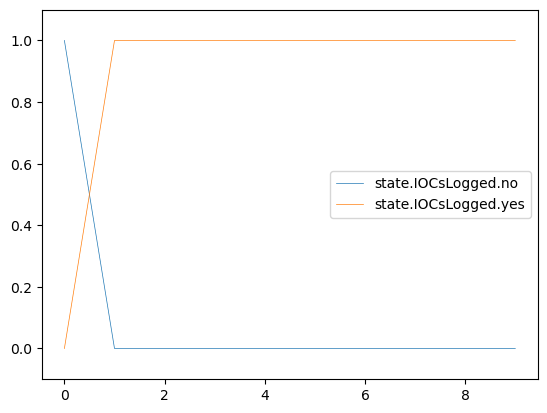

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0            Nop   
2                    0.0                     1.0            Nop   
3                    0.0                     1.0            Nop   
4                    0.0                     1.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

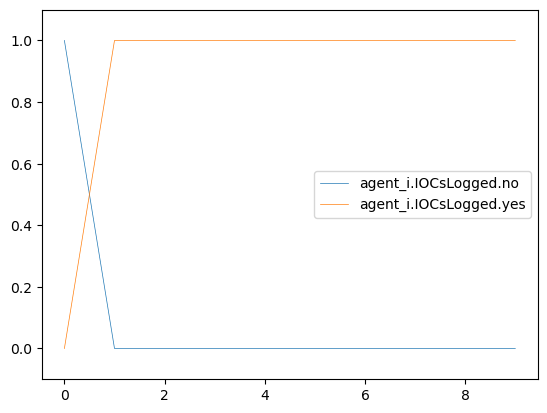

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.142857                0.857143           Exit   
2               0.142857                0.857143            Nop   
3               0.142857                0.857143            Nop   
4               0.142857                0.857143            Nop   
5               0.142857                0.857143            Nop   
6               0.142857                0.857143            Nop   
7               0.142857                0.857143            Nop   
8               0.142857                0.857143            Nop   
9               0.142857                0.857143            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                            auth                   user_files   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                         none   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

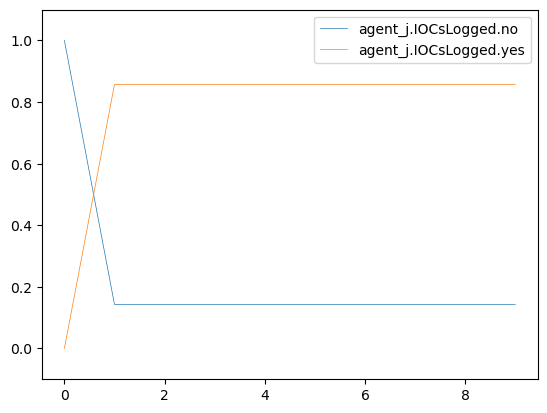

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs   EnumAccounts
1                   0.0                    1.0            Nop           Exit
2                   0.0                    1.0            Nop            Nop
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

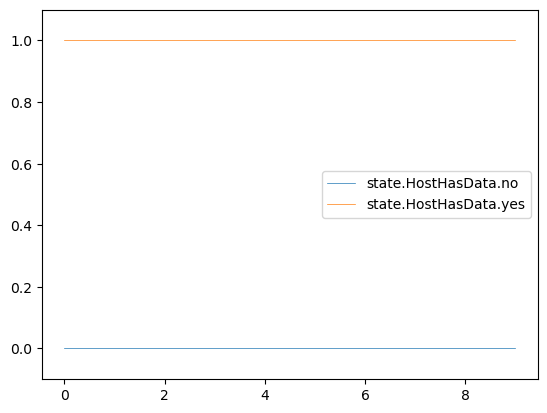

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

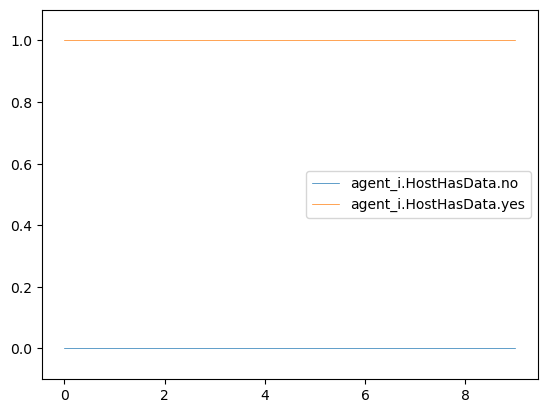

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5           Exit   
2                     0.5                      0.5            Nop   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                            auth                   user_files   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                         none   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

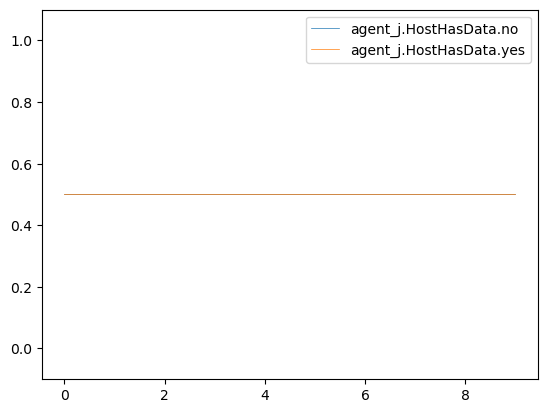

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs   EnumAccounts
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

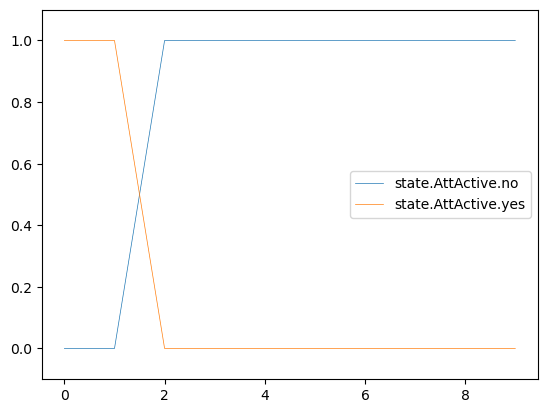

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000           1.000000e+00        LogIOCs   EnumAccounts   
1              0.000000           9.999999e-01            Nop           Exit   
2              0.990000           1.000000e-02            Nop            Nop   
3              0.998704           1.295710e-03            Nop            Nop   
4              0.999898           1.018680e-04            Nop            Nop   
5              0.999997           2.645964e-06            Nop            Nop   
6              1.000000           1.975023e-08            Nop            Nop   
7              1.000000           0.000000e+00            Nop            Nop   
8              1.000000           0.000000e+00            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

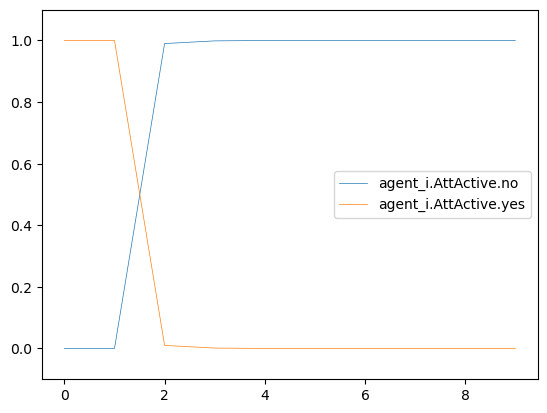

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0   EnumAccounts        LogIOCs   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                         none   
7                            auth                         none   
8                          denied                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

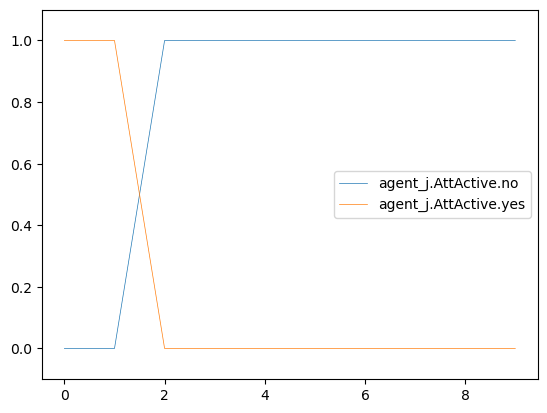

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                             none
3                               1.0                             none
4                               1.0                       file_write
5                               1.0                   login_activity
6                               1.0                   login_activity
7                               1.0                             none
8                               1.0                       file_write
9                               1.0                   login_activity

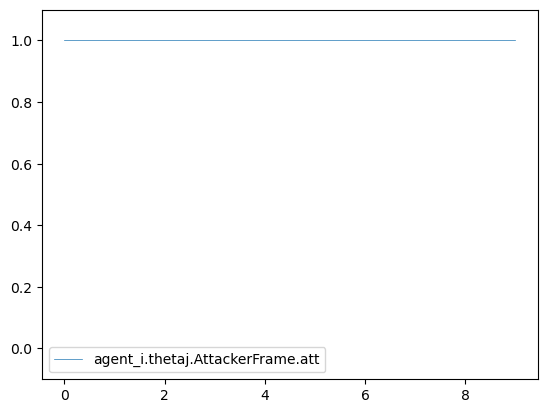

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.904762                        0.095238   
3                         0.904762                        0.095238   
4                         0.904762                        0.095238   
5                         0.904762                        0.095238   
6                         0.904762                        0.095238   
7                         0.904762                        0.095238   
8                         0.904762                        0.095238   
9                         0.904762                        0.095238   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                         none   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                   user_files   
7                            auth                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

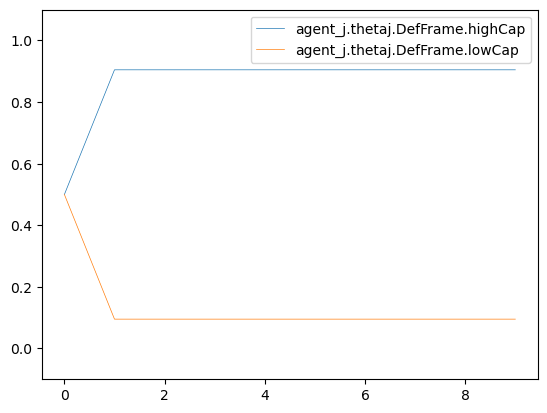

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs   EnumAccounts
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

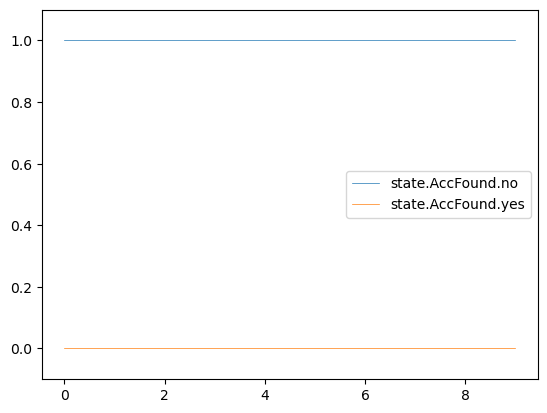

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0        LogIOCs   EnumAccounts   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                       file_write  
5                   login_activity  
6                   login_activity  
7                             none  
8                       file_write  
9                   login_activity

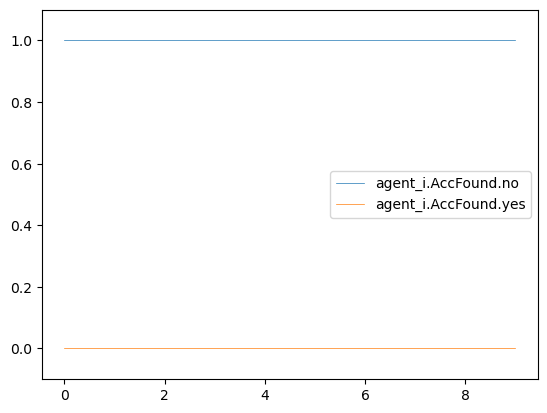

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000   EnumAccounts        LogIOCs   
1             0.171053              0.828947           Exit            Nop   
2             0.171053              0.828947            Nop            Nop   
3             0.171053              0.828947            Nop            Nop   
4             0.171053              0.828947            Nop            Nop   
5             0.171053              0.828947            Nop            Nop   
6             0.171053              0.828947            Nop            Nop   
7             0.171053              0.828947            Nop            Nop   
8             0.171053              0.828947            Nop            Nop   
9             0.171053              0.828947            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                         none   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                   user_files   
7                            auth                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

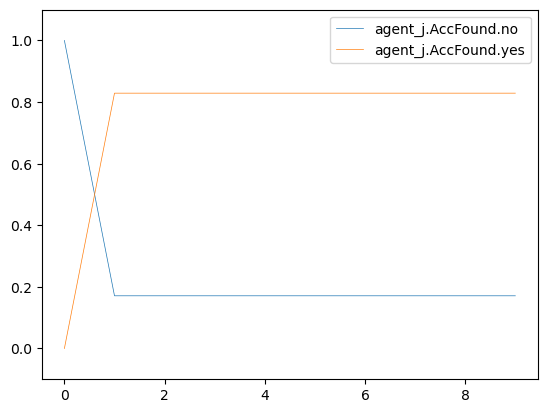

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs   EnumAccounts
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

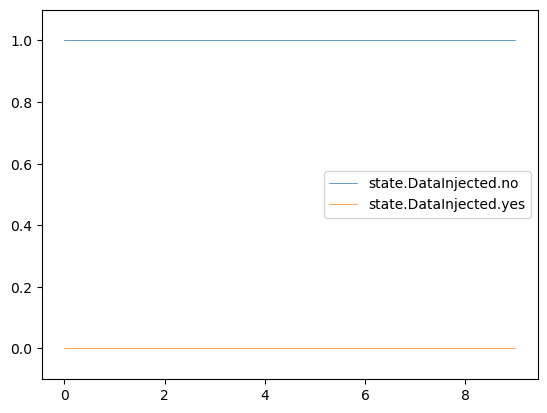

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                   login_activity  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                   login_activity

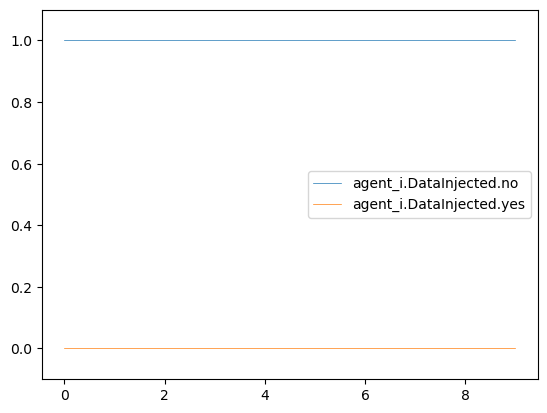

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                         none   
2            Nop                            auth                   user_files   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

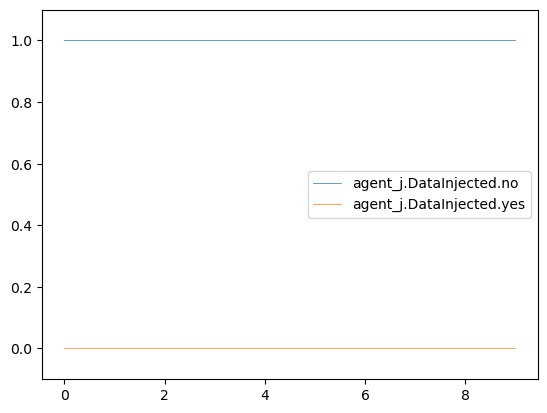

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs   EnumAccounts
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

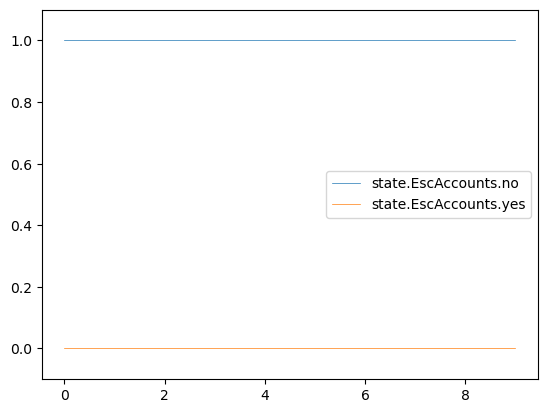

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                   login_activity  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                   login_activity

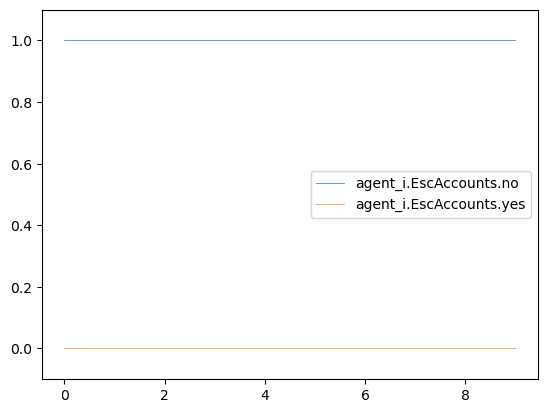

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.131579                 0.868421           Exit   
2                0.131579                 0.868421            Nop   
3                0.131579                 0.868421            Nop   
4                0.131579                 0.868421            Nop   
5                0.131579                 0.868421            Nop   
6                0.131579                 0.868421            Nop   
7                0.131579                 0.868421            Nop   
8                0.131579                 0.868421            Nop   
9                0.131579                 0.868421            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                         none   
2            Nop                            auth                   user_files   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

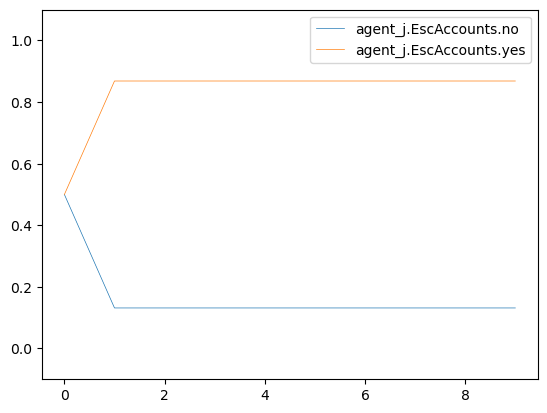

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs   EnumAccounts  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

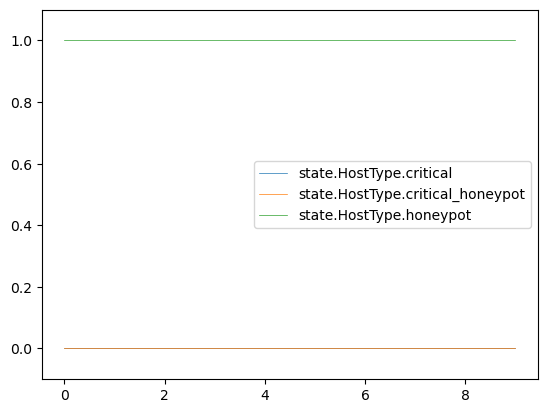

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs   EnumAccounts   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                       file_write  
5                   login_activity  
6                   login_activity  
7                             none  
8                       file_write  
9                   login_activity

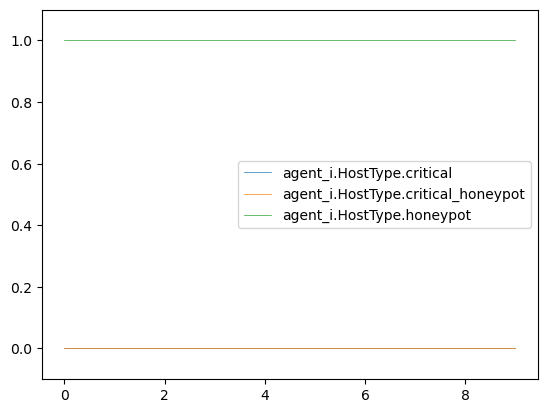

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.0   EnumAccounts        LogIOCs   
1                        0.0           Exit            Nop   
2                        0.0            Nop            Nop   
3                        0.0            Nop            Nop   
4                        0.0            Nop            Nop   
5                        0.0            Nop            Nop   
6                        0.0            Nop            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                         none   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                   user_files   
7                            auth                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

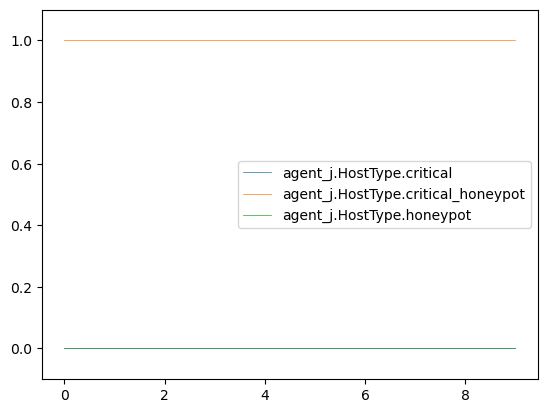

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs   EnumAccounts
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

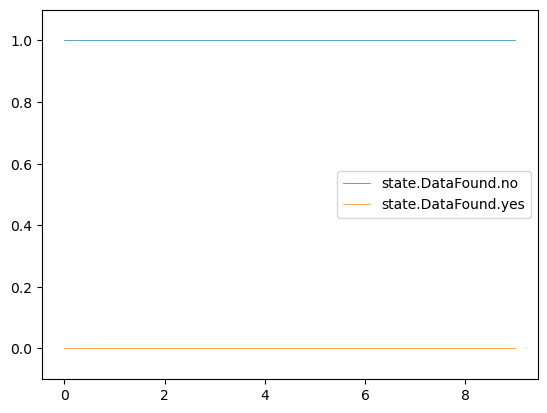

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs   EnumAccounts   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                       file_write  
5                   login_activity  
6                   login_activity  
7                             none  
8                       file_write  
9                   login_activity

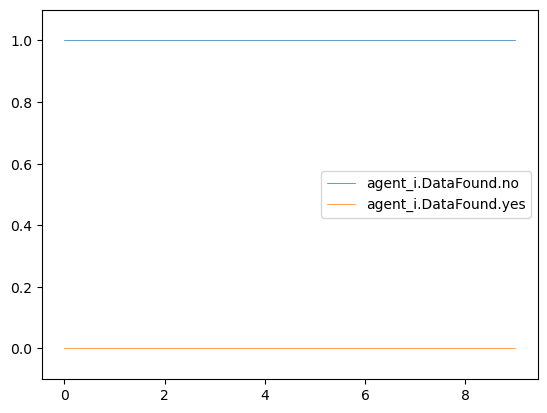

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0                   1.0                    0.0   EnumAccounts        LogIOCs   
1                   1.0                    0.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                         none   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                   user_files   
7                            auth                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

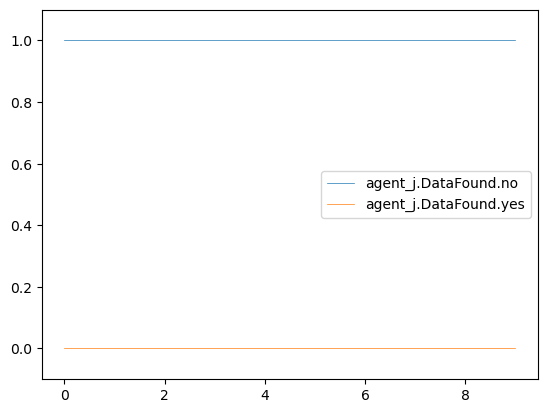

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

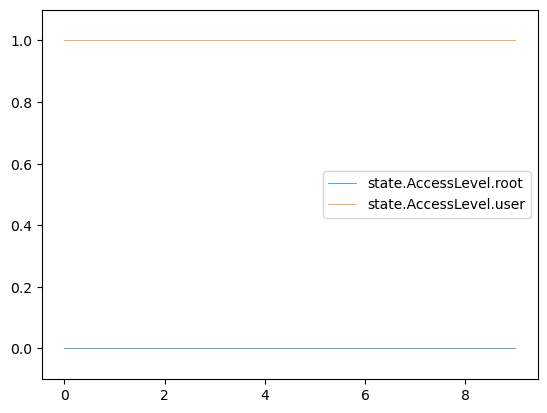

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                   login_activity  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                   login_activity

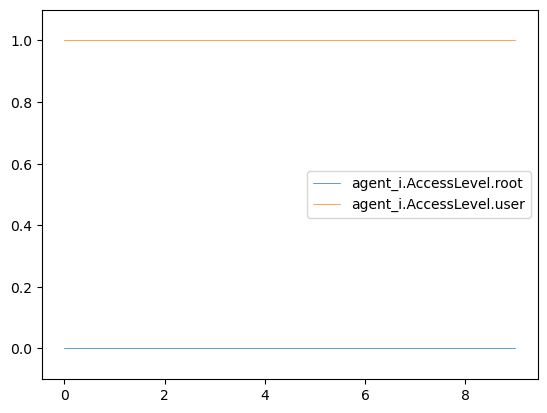

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                         none   
2            Nop                            auth                   user_files   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

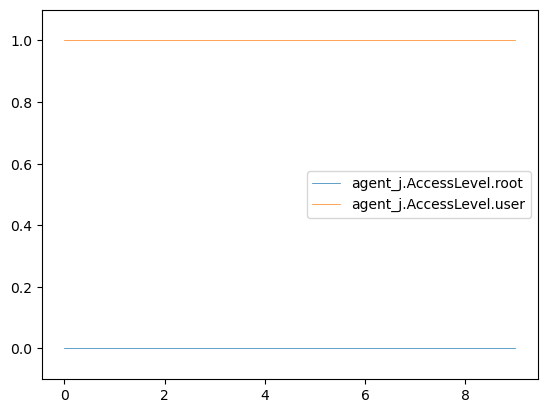

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   0.0                   1.0        LogIOCs   EnumAccounts
1                   0.0                   1.0            Nop           Exit
2                   0.0                   1.0            Nop            Nop
3                   0.0                   1.0            Nop            Nop
4                   0.0                   1.0            Nop            Nop
5                   0.0                   1.0            Nop            Nop
6                   0.0                   1.0            Nop            Nop
7                   0.0                   1.0            Nop            Nop
8                   0.0                   1.0            Nop            Nop
9                   0.0                   1.0            Nop            Nop

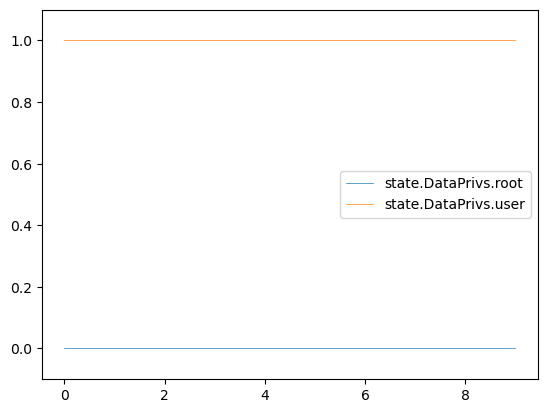

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                   login_activity  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                   login_activity

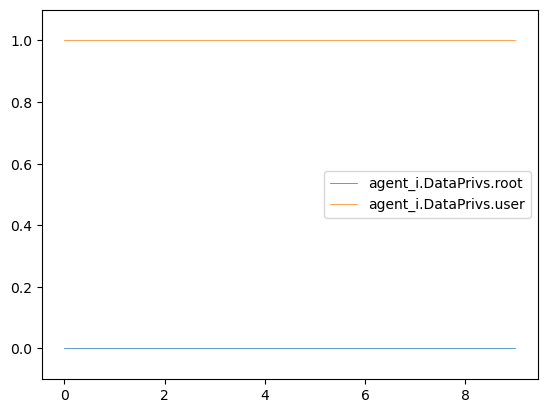

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.571429                0.428571           Exit   
2                1.000000                0.000000            Nop   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                         none   
2            Nop                            auth                   user_files   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

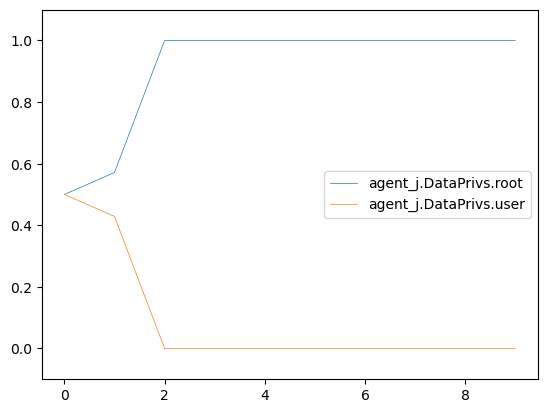

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs   EnumAccounts
1                  0.0                   1.0            Nop           Exit
2                  0.0                   1.0            Nop            Nop
3                  0.0                   1.0            Nop            Nop
4                  0.0                   1.0            Nop            Nop
5                  0.0                   1.0            Nop            Nop
6                  0.0                   1.0            Nop            Nop
7                  0.0                   1.0            Nop            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

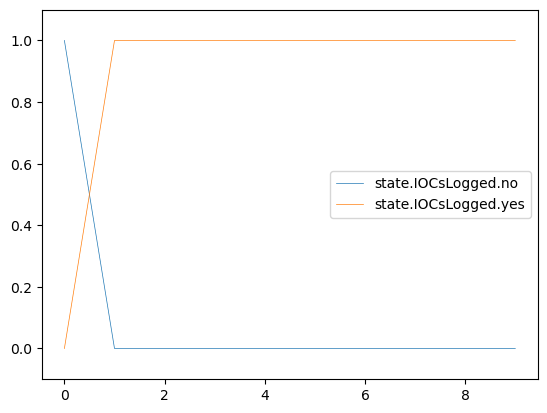

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0            Nop   
2                    0.0                     1.0            Nop   
3                    0.0                     1.0            Nop   
4                    0.0                     1.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                   login_activity  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                   login_activity

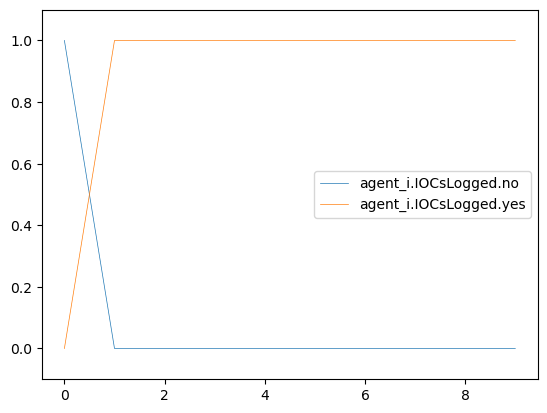

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.142857                0.857143           Exit   
2               0.142857                0.857143            Nop   
3               0.142857                0.857143            Nop   
4               0.142857                0.857143            Nop   
5               0.142857                0.857143            Nop   
6               0.142857                0.857143            Nop   
7               0.142857                0.857143            Nop   
8               0.142857                0.857143            Nop   
9               0.142857                0.857143            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                         none   
2            Nop                            auth                   user_files   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

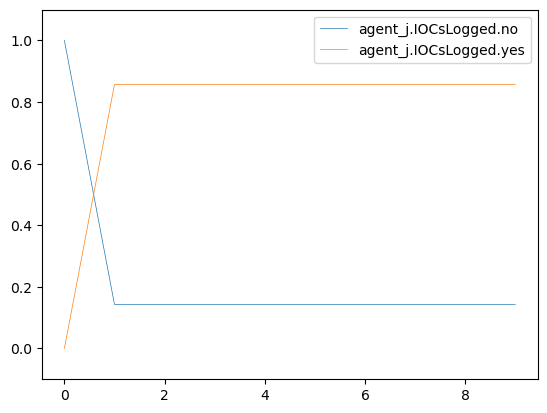

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs   EnumAccounts
1                   0.0                    1.0            Nop           Exit
2                   0.0                    1.0            Nop            Nop
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

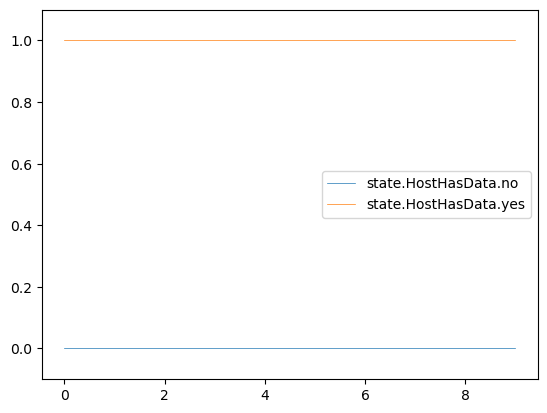

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                   login_activity  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                   login_activity

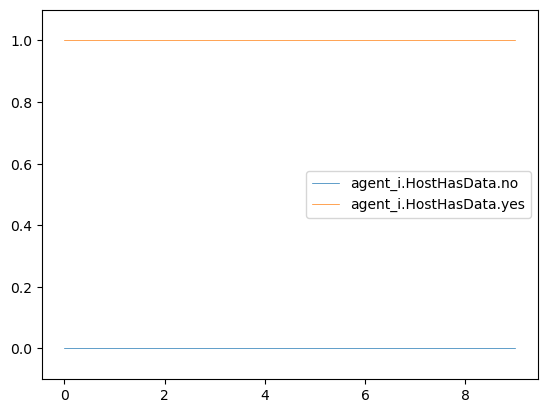

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5           Exit   
2                     0.5                      0.5            Nop   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                            auth                         none   
2            Nop                            auth                   user_files   
3            Nop                            auth                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                   user_files   
7            Nop                            auth                         none   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

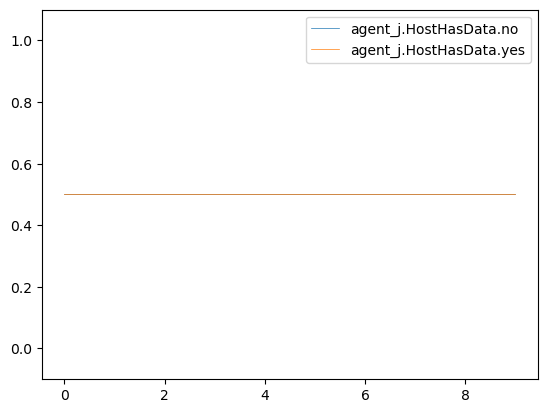

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs   EnumAccounts
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

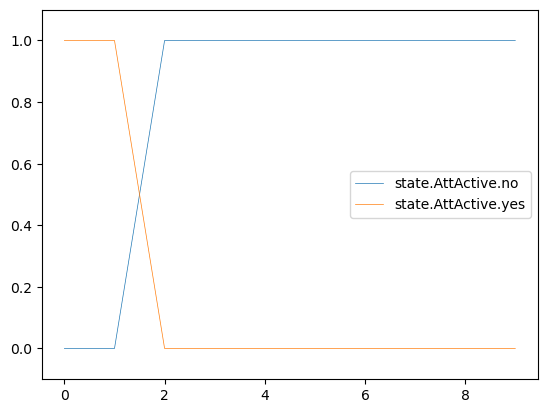

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000        LogIOCs   EnumAccounts   
1              0.000000               1.000000            Nop           Exit   
2              0.994261               0.005739            Nop            Nop   
3              0.999259               0.000741            Nop            Nop   
4              0.999906               0.000094            Nop            Nop   
5              0.999982               0.000018            Nop            Nop   
6              0.999994               0.000006            Nop            Nop   
7              1.000000               0.000000            Nop            Nop   
8              1.000000               0.000000            Nop            Nop   
9              1.000000               0.000000            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                       file_write  
5                   login_activity  
6                   login_activity  
7                             none  
8                       file_write  
9                   login_activity

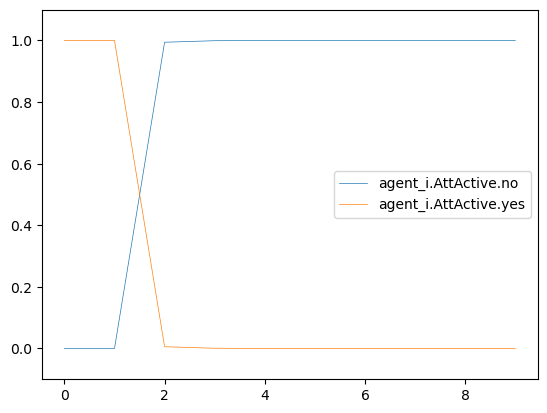

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0   EnumAccounts        LogIOCs   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                         none   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                   user_files   
7                            auth                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

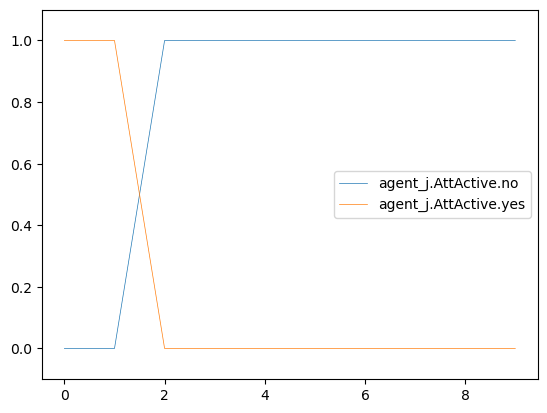

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                             none
2                               1.0                       file_write
3                               1.0                             none
4                               1.0                             none
5                               1.0                        file_enum
6                               1.0                   login_activity
7                               1.0                        file_enum
8                               1.0                             none
9                               1.0                       file_write

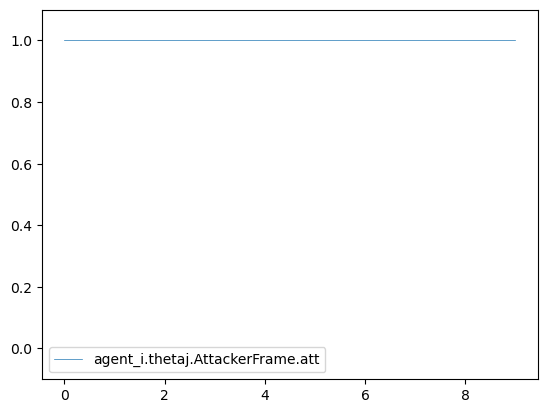

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.904762                        0.095238   
3                         0.904762                        0.095238   
4                         0.904762                        0.095238   
5                         0.904762                        0.095238   
6                         0.904762                        0.095238   
7                         0.904762                        0.095238   
8                         0.904762                        0.095238   
9                         0.904762                        0.095238   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                         none   
3                          denied                         none   
4                            auth                   user_files   
5                          denied                         none   
6                          denied                         none   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

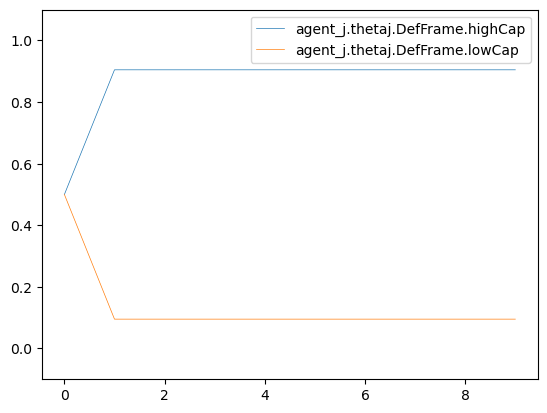

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs   EnumAccounts
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

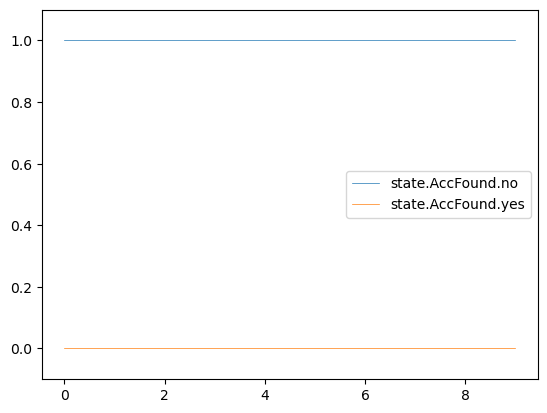

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0        LogIOCs   EnumAccounts   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                       file_write  
3                             none  
4                             none  
5                        file_enum  
6                   login_activity  
7                        file_enum  
8                             none  
9                       file_write

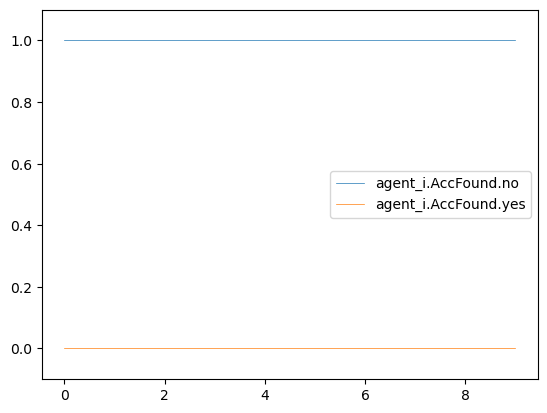

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000   EnumAccounts        LogIOCs   
1             0.171053              0.828947           Exit            Nop   
2             0.171053              0.828947            Nop            Nop   
3             0.171053              0.828947            Nop            Nop   
4             0.171053              0.828947            Nop            Nop   
5             0.171053              0.828947            Nop            Nop   
6             0.171053              0.828947            Nop            Nop   
7             0.171053              0.828947            Nop            Nop   
8             0.171053              0.828947            Nop            Nop   
9             0.171053              0.828947            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                         none   
3                          denied                         none   
4                            auth                   user_files   
5                          denied                         none   
6                          denied                         none   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

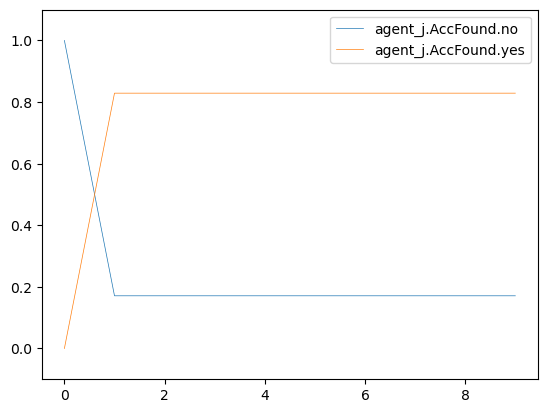

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs   EnumAccounts
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

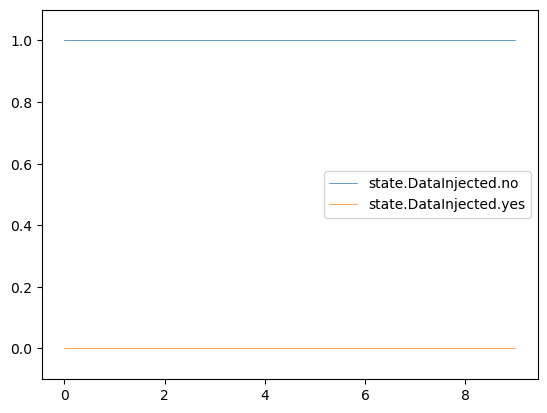

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                   login_activity  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                       file_write

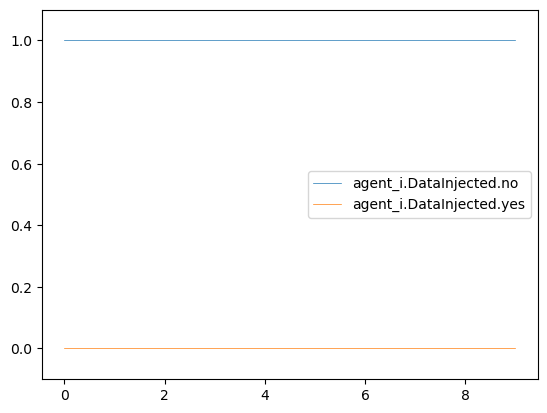

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                          denied                         none   
7            Nop                            auth                   user_files   
8            Nop                            auth                         none   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

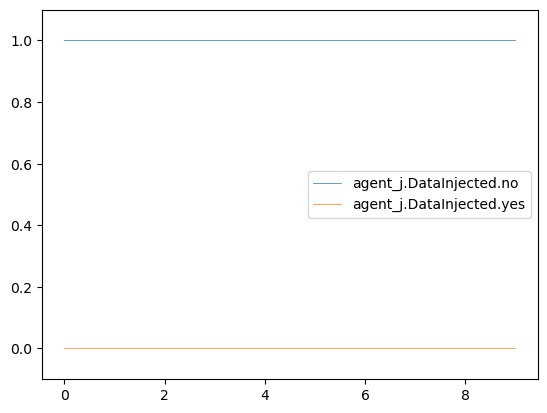

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs   EnumAccounts
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

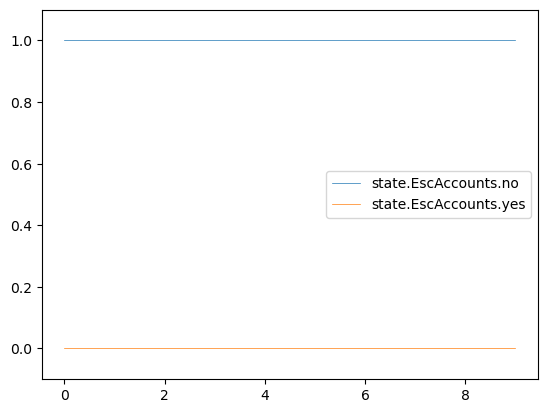

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                   login_activity  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                       file_write

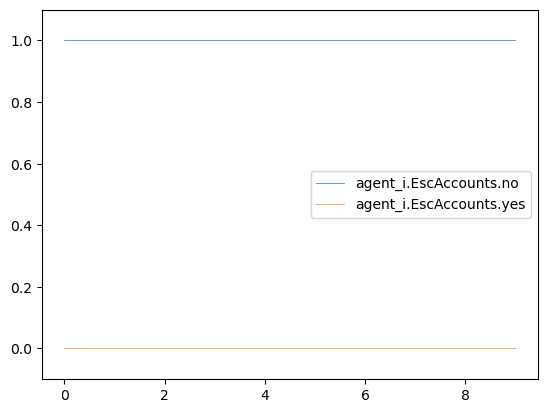

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.131579                 0.868421           Exit   
2                0.131579                 0.868421            Nop   
3                0.131579                 0.868421            Nop   
4                0.131579                 0.868421            Nop   
5                0.131579                 0.868421            Nop   
6                0.131579                 0.868421            Nop   
7                0.131579                 0.868421            Nop   
8                0.131579                 0.868421            Nop   
9                0.131579                 0.868421            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                          denied                         none   
7            Nop                            auth                   user_files   
8            Nop                            auth                         none   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

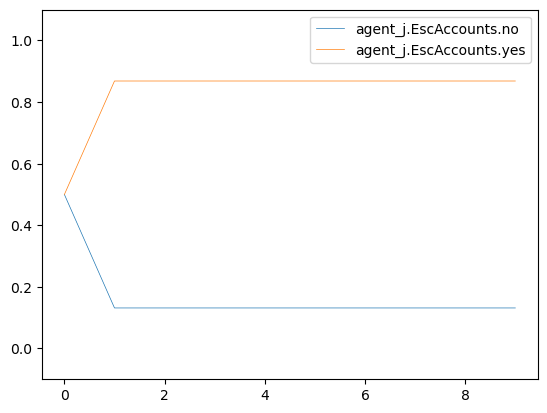

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs   EnumAccounts  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

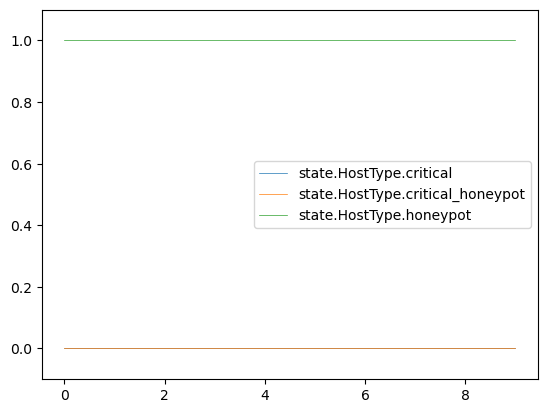

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs   EnumAccounts   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                       file_write  
3                             none  
4                             none  
5                        file_enum  
6                   login_activity  
7                        file_enum  
8                             none  
9                       file_write

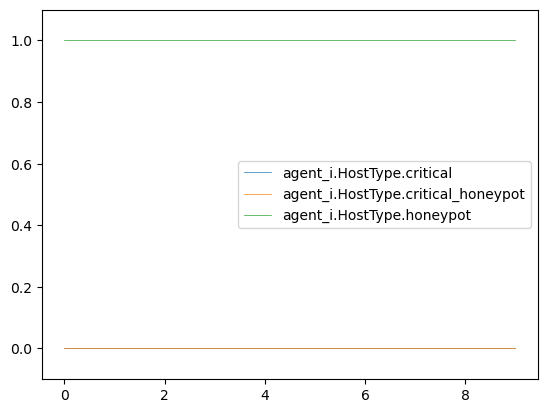

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.0   EnumAccounts        LogIOCs   
1                        0.0           Exit            Nop   
2                        0.0            Nop            Nop   
3                        0.0            Nop            Nop   
4                        0.0            Nop            Nop   
5                        0.0            Nop            Nop   
6                        0.0            Nop            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                         none   
3                          denied                         none   
4                            auth                   user_files   
5                          denied                         none   
6                          denied                         none   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

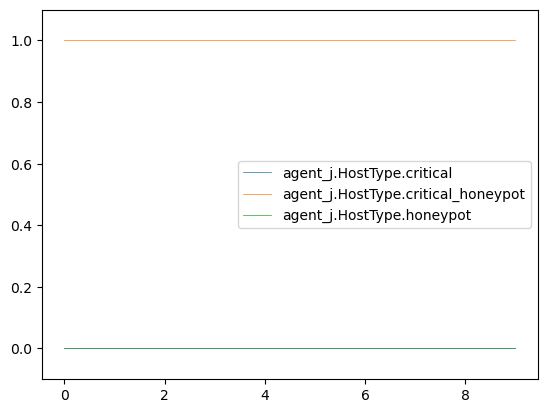

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs   EnumAccounts
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

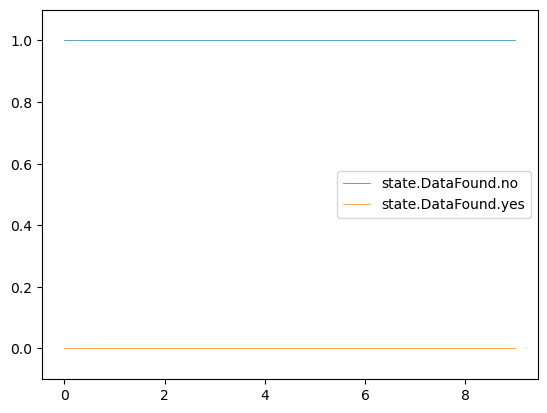

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs   EnumAccounts   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                       file_write  
3                             none  
4                             none  
5                        file_enum  
6                   login_activity  
7                        file_enum  
8                             none  
9                       file_write

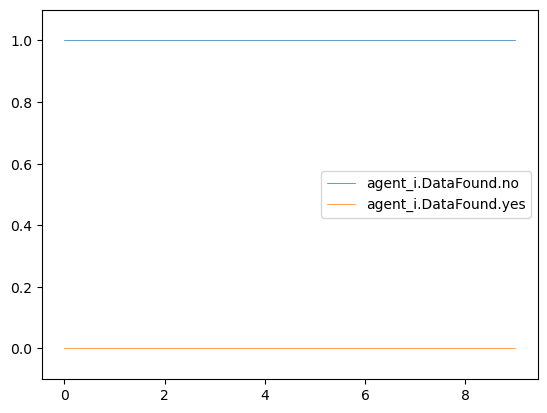

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0                   1.0                    0.0   EnumAccounts        LogIOCs   
1                   1.0                    0.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                         none   
3                          denied                         none   
4                            auth                   user_files   
5                          denied                         none   
6                          denied                         none   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

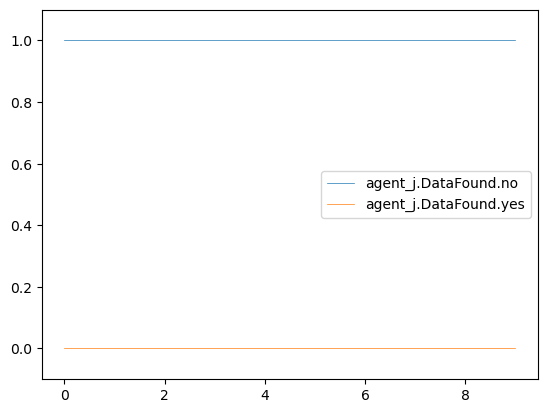

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

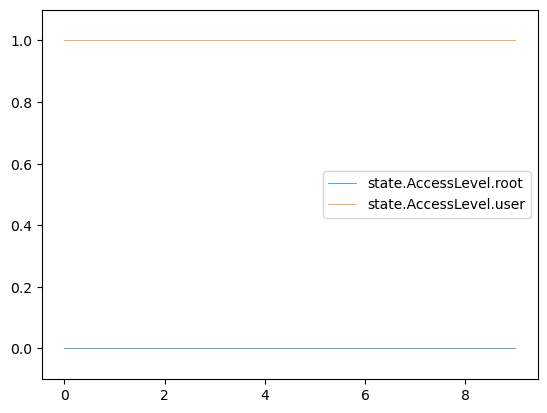

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                   login_activity  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                       file_write

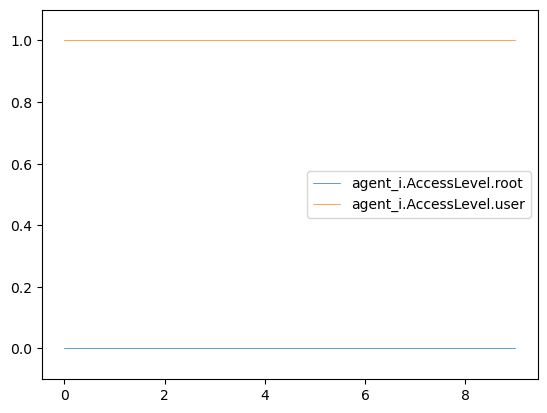

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                          denied                         none   
7            Nop                            auth                   user_files   
8            Nop                            auth                         none   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

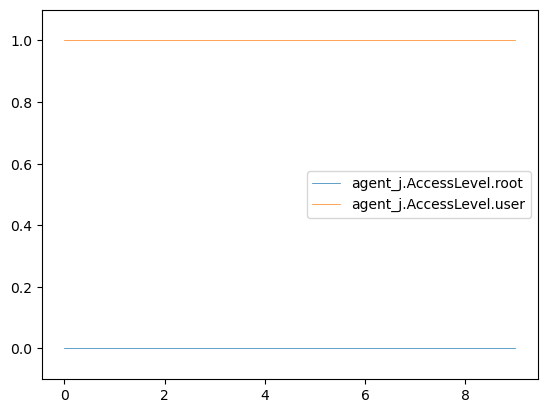

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   0.0                   1.0        LogIOCs   EnumAccounts
1                   0.0                   1.0            Nop           Exit
2                   0.0                   1.0            Nop            Nop
3                   0.0                   1.0            Nop            Nop
4                   0.0                   1.0            Nop            Nop
5                   0.0                   1.0            Nop            Nop
6                   0.0                   1.0            Nop            Nop
7                   0.0                   1.0            Nop            Nop
8                   0.0                   1.0            Nop            Nop
9                   0.0                   1.0            Nop            Nop

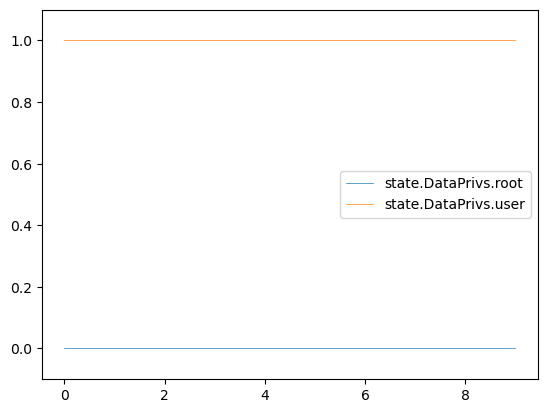

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                   login_activity  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                       file_write

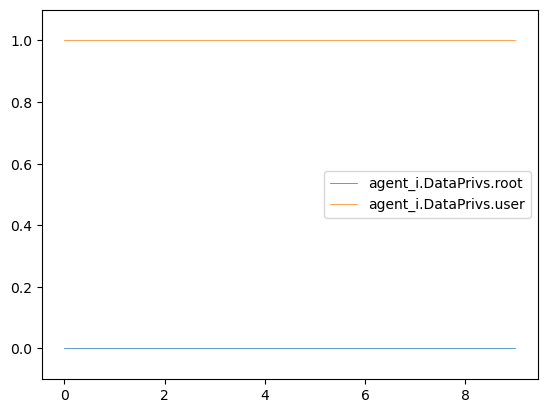

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.571429                0.428571           Exit   
2                1.000000                0.000000            Nop   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                          denied                         none   
7            Nop                            auth                   user_files   
8            Nop                            auth                         none   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

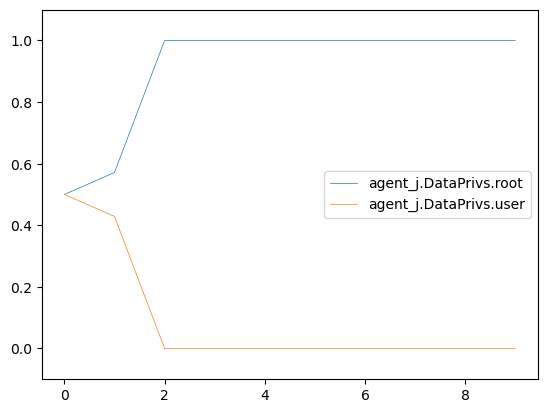

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs   EnumAccounts
1                  0.0                   1.0            Nop           Exit
2                  0.0                   1.0            Nop            Nop
3                  0.0                   1.0            Nop            Nop
4                  0.0                   1.0            Nop            Nop
5                  0.0                   1.0            Nop            Nop
6                  0.0                   1.0            Nop            Nop
7                  0.0                   1.0            Nop            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

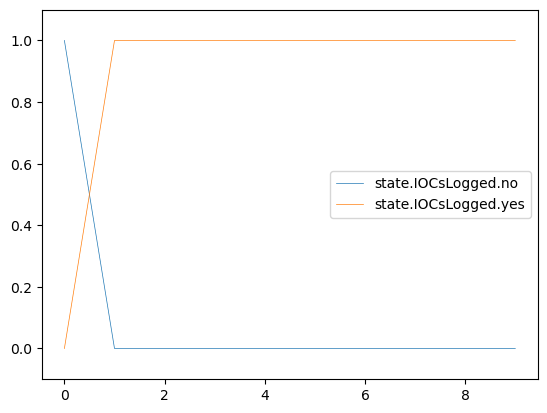

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0            Nop   
2                    0.0                     1.0            Nop   
3                    0.0                     1.0            Nop   
4                    0.0                     1.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                   login_activity  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                       file_write

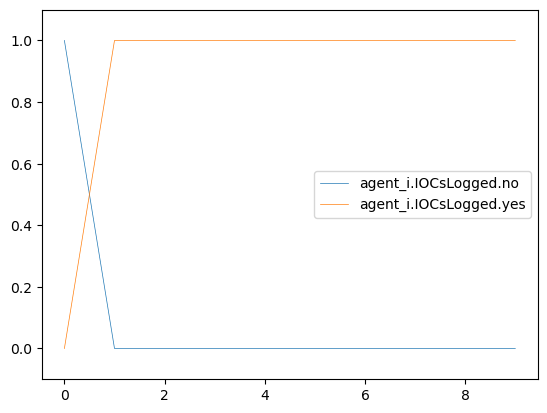

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.142857                0.857143           Exit   
2               0.142857                0.857143            Nop   
3               0.142857                0.857143            Nop   
4               0.142857                0.857143            Nop   
5               0.142857                0.857143            Nop   
6               0.142857                0.857143            Nop   
7               0.142857                0.857143            Nop   
8               0.142857                0.857143            Nop   
9               0.142857                0.857143            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                          denied                         none   
7            Nop                            auth                   user_files   
8            Nop                            auth                         none   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

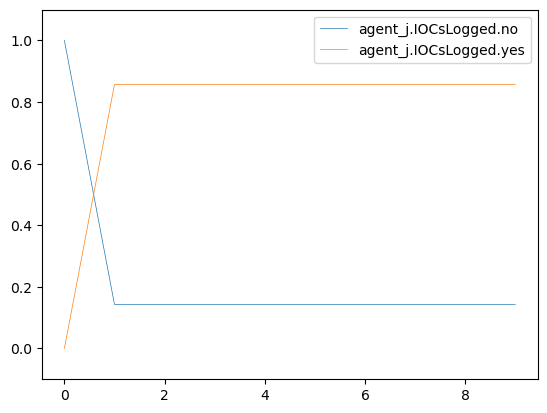

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs   EnumAccounts
1                   0.0                    1.0            Nop           Exit
2                   0.0                    1.0            Nop            Nop
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

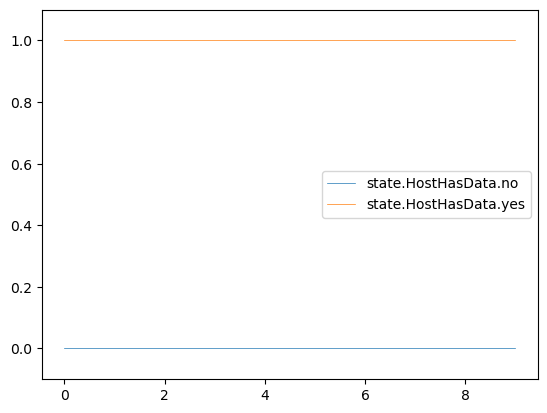

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                   login_activity  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                       file_write

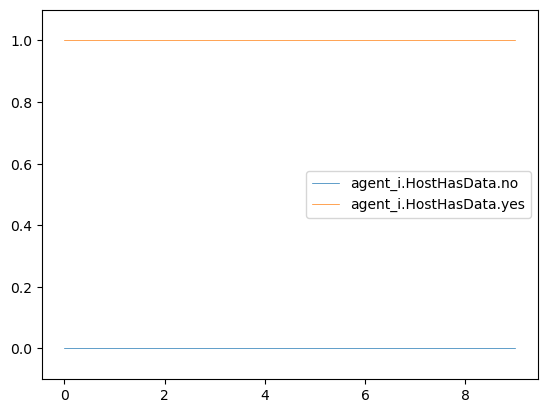

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5           Exit   
2                     0.5                      0.5            Nop   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                          denied                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                          denied                         none   
7            Nop                            auth                   user_files   
8            Nop                            auth                         none   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

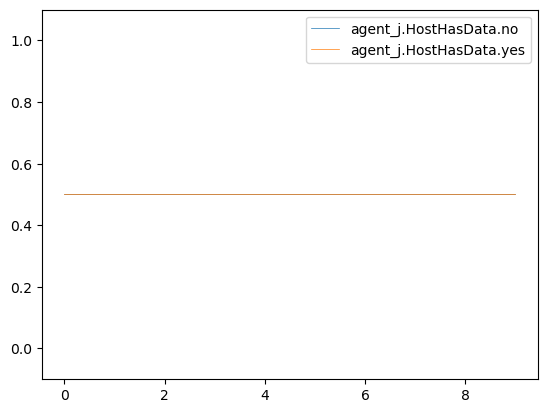

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs   EnumAccounts
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

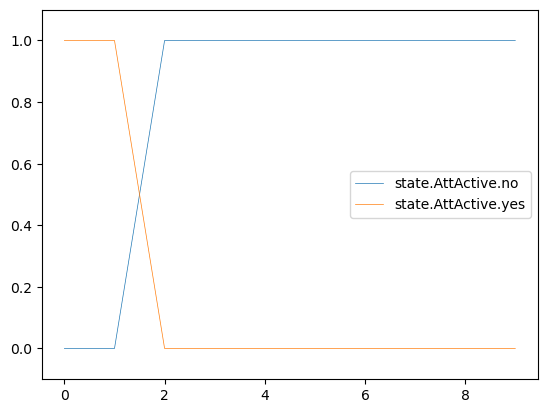

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000           1.000000e+00        LogIOCs   EnumAccounts   
1              0.000000           1.000000e+00            Nop           Exit   
2              0.994261           5.738881e-03            Nop            Nop   
3              0.994835           5.164993e-03            Nop            Nop   
4              0.999343           6.574304e-04            Nop            Nop   
5              0.999982           1.772737e-05            Nop            Nop   
6              0.999999           8.923220e-07            Nop            Nop   
7              1.000000           0.000000e+00            Nop            Nop   
8              1.000000           0.000000e+00            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                       file_write  
3                             none  
4                             none  
5                        file_enum  
6                   login_activity  
7                        file_enum  
8                             none  
9                       file_write

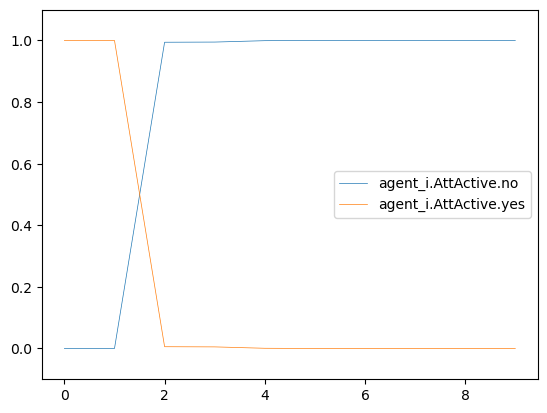

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0   EnumAccounts        LogIOCs   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                         none   
3                          denied                         none   
4                            auth                   user_files   
5                          denied                         none   
6                          denied                         none   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

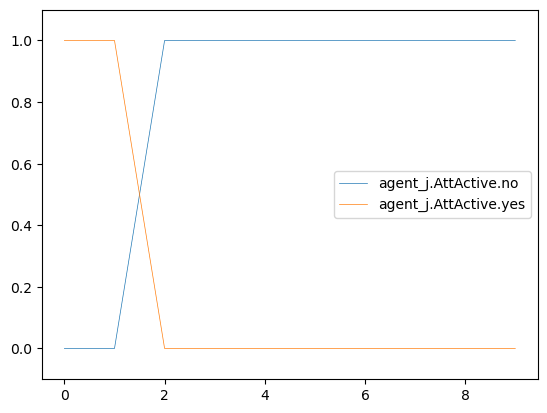

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                             none
2                               1.0                        file_enum
3                               1.0                       file_write
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                        file_enum
9                               1.0                             none

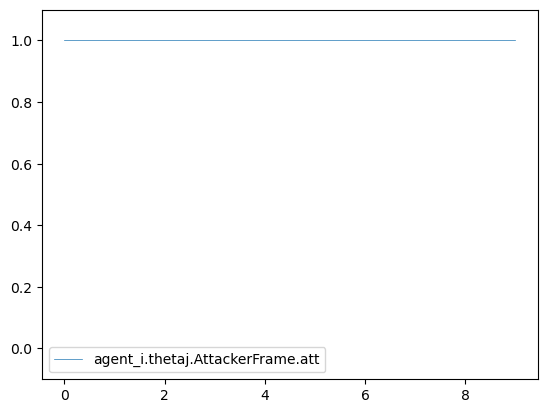

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.904762                        0.095238   
3                         0.904762                        0.095238   
4                         0.904762                        0.095238   
5                         0.904762                        0.095238   
6                         0.904762                        0.095238   
7                         0.904762                        0.095238   
8                         0.904762                        0.095238   
9                         0.904762                        0.095238   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                   user_files   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                         none   
7                          denied                         none   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

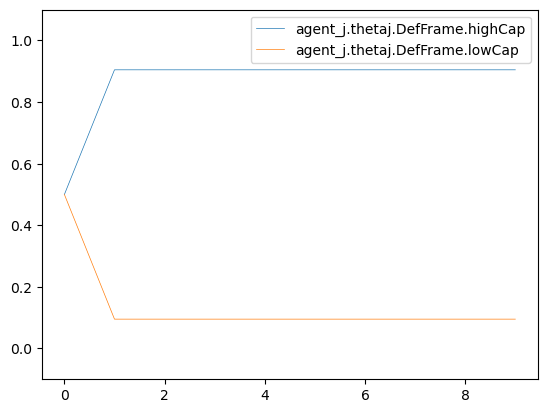

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs   EnumAccounts
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

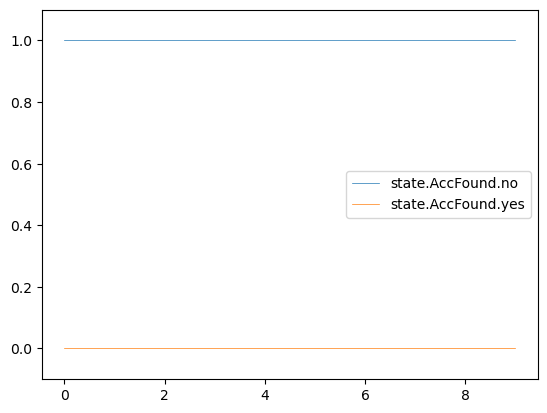

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0        LogIOCs   EnumAccounts   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                        file_enum  
3                       file_write  
4                             none  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                             none

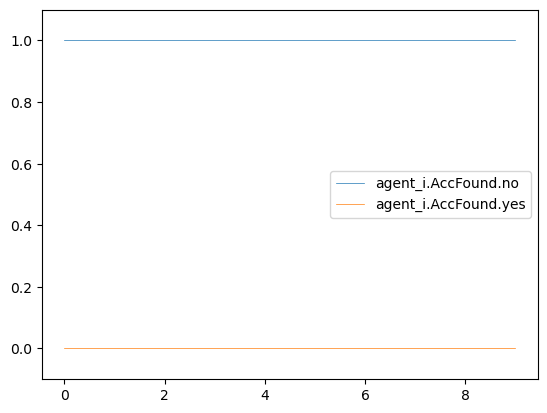

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000   EnumAccounts        LogIOCs   
1             0.943548              0.056452           Exit            Nop   
2             0.943548              0.056452            Nop            Nop   
3             0.943548              0.056452            Nop            Nop   
4             0.943548              0.056452            Nop            Nop   
5             0.943548              0.056452            Nop            Nop   
6             0.943548              0.056452            Nop            Nop   
7             0.943548              0.056452            Nop            Nop   
8             0.943548              0.056452            Nop            Nop   
9             0.943548              0.056452            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                   user_files   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                         none   
7                          denied                         none   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

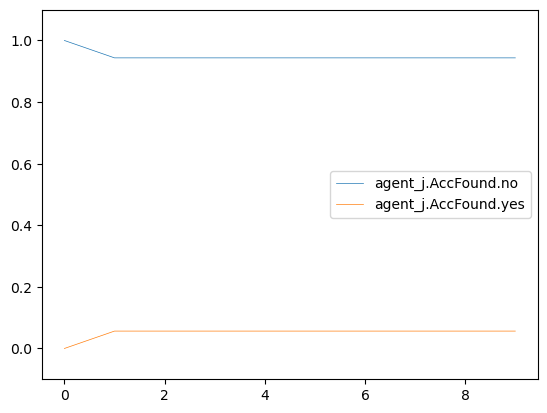

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs   EnumAccounts
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

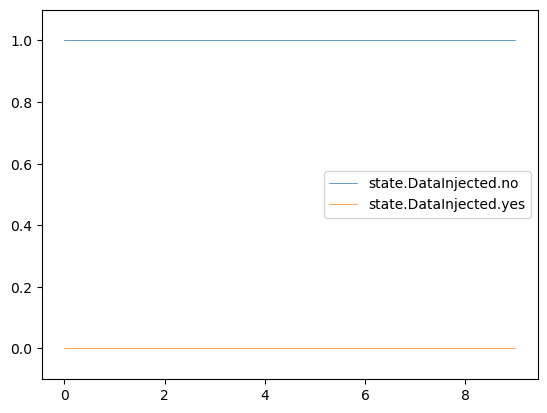

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                       file_write  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

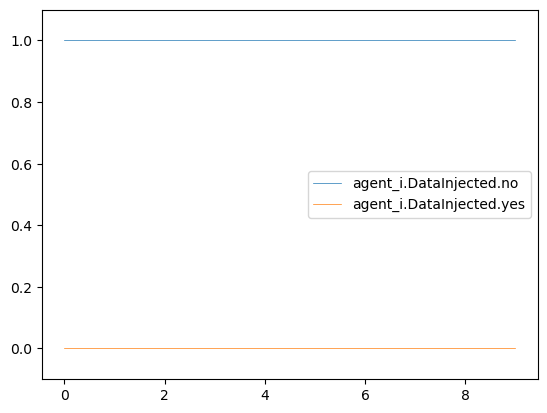

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                            auth                         none   
3            Nop                          denied                   user_files   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                         none   
7            Nop                          denied                         none   
8            Nop                            auth                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

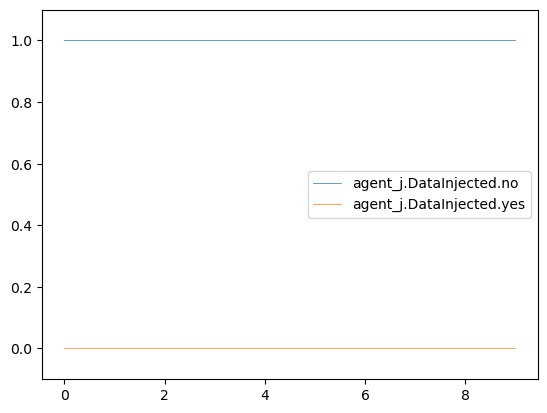

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs   EnumAccounts
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

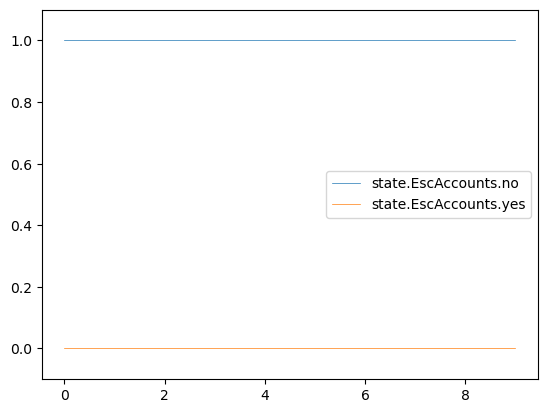

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                       file_write  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

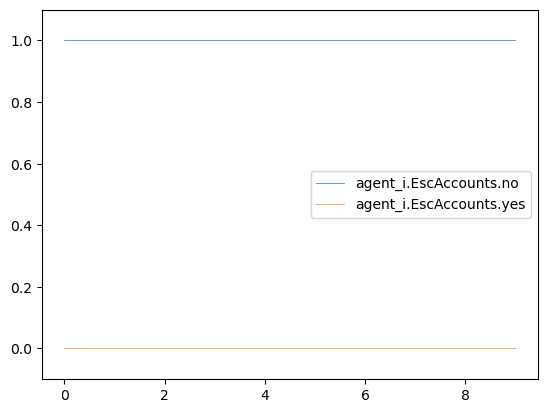

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194           Exit   
2                0.725806                 0.274194            Nop   
3                0.725806                 0.274194            Nop   
4                0.725806                 0.274194            Nop   
5                0.725806                 0.274194            Nop   
6                0.725806                 0.274194            Nop   
7                0.725806                 0.274194            Nop   
8                0.725806                 0.274194            Nop   
9                0.725806                 0.274194            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                            auth                         none   
3            Nop                          denied                   user_files   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                         none   
7            Nop                          denied                         none   
8            Nop                            auth                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

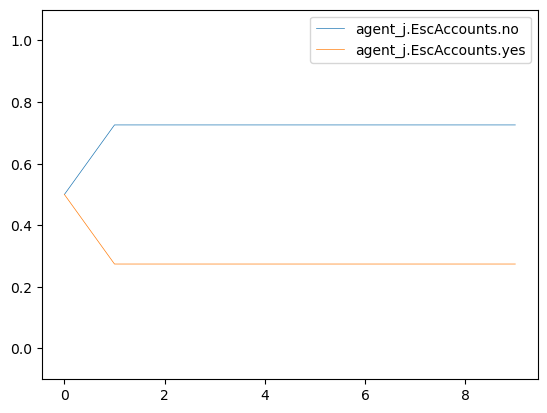

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs   EnumAccounts  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

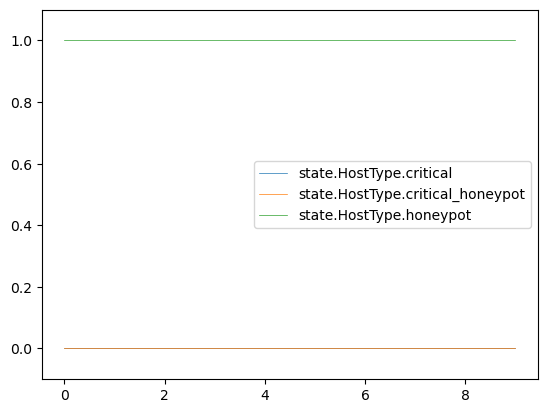

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs   EnumAccounts   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                        file_enum  
3                       file_write  
4                             none  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                             none

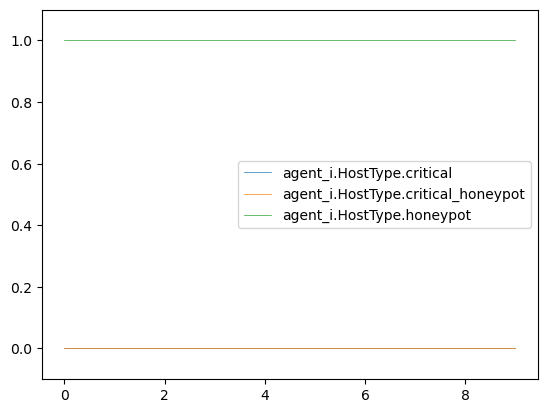

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.0   EnumAccounts        LogIOCs   
1                        0.0           Exit            Nop   
2                        0.0            Nop            Nop   
3                        0.0            Nop            Nop   
4                        0.0            Nop            Nop   
5                        0.0            Nop            Nop   
6                        0.0            Nop            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                   user_files   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                         none   
7                          denied                         none   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

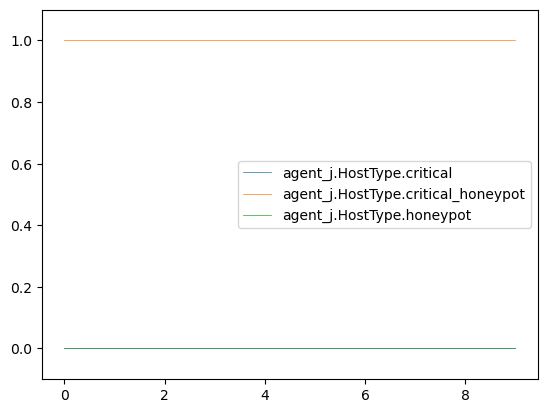

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs   EnumAccounts
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

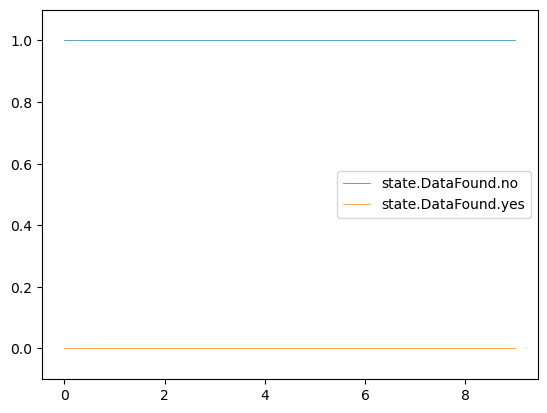

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs   EnumAccounts   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                        file_enum  
3                       file_write  
4                             none  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                             none

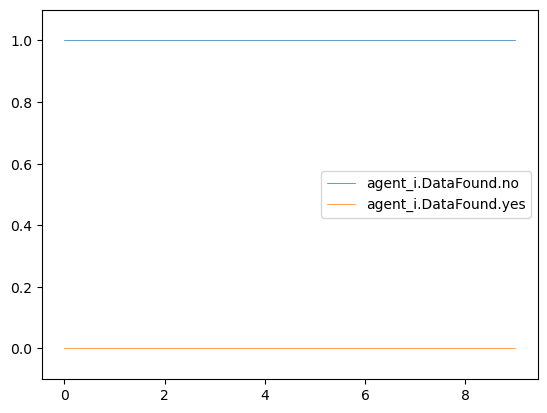

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0                   1.0                    0.0   EnumAccounts        LogIOCs   
1                   1.0                    0.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                   user_files   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                         none   
7                          denied                         none   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

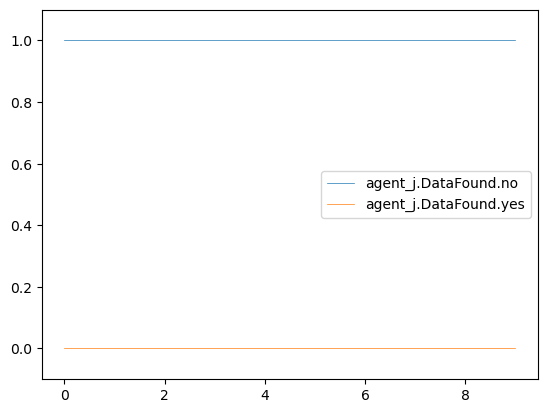

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

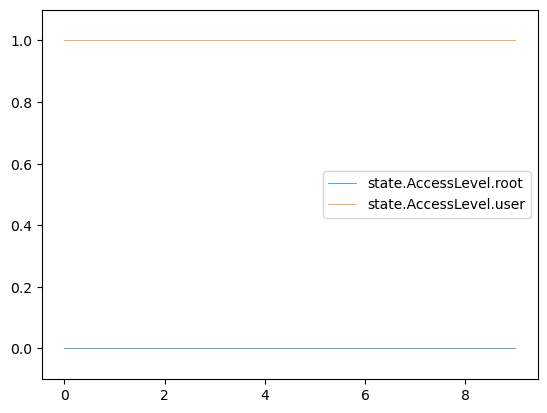

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                       file_write  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

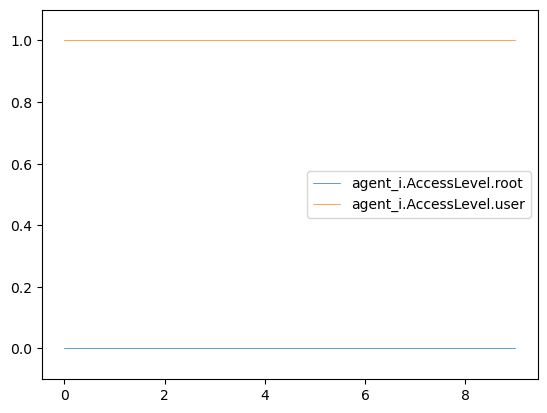

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                            auth                         none   
3            Nop                          denied                   user_files   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                         none   
7            Nop                          denied                         none   
8            Nop                            auth                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

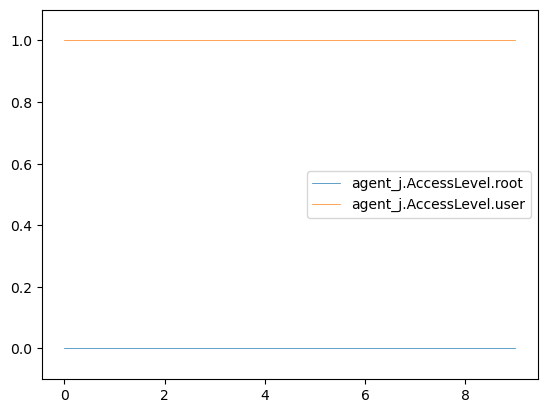

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   0.0                   1.0        LogIOCs   EnumAccounts
1                   0.0                   1.0            Nop           Exit
2                   0.0                   1.0            Nop            Nop
3                   0.0                   1.0            Nop            Nop
4                   0.0                   1.0            Nop            Nop
5                   0.0                   1.0            Nop            Nop
6                   0.0                   1.0            Nop            Nop
7                   0.0                   1.0            Nop            Nop
8                   0.0                   1.0            Nop            Nop
9                   0.0                   1.0            Nop            Nop

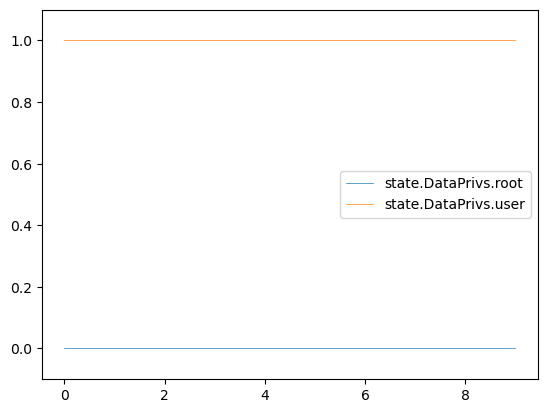

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                       file_write  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

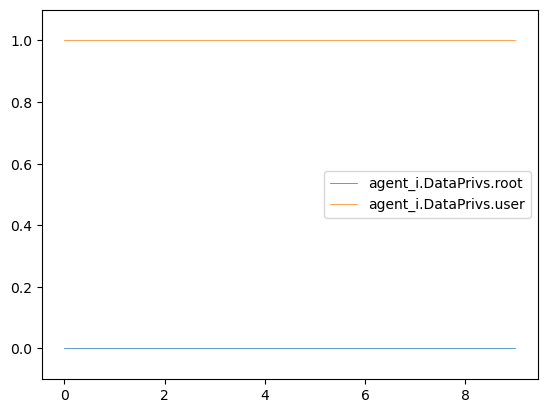

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.571429                0.428571           Exit   
2                1.000000                0.000000            Nop   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                            auth                         none   
3            Nop                          denied                   user_files   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                         none   
7            Nop                          denied                         none   
8            Nop                            auth                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

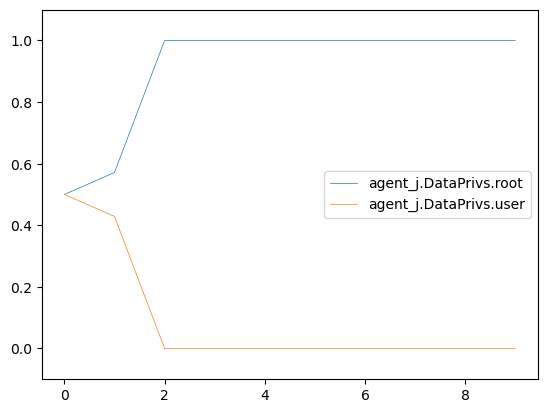

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs   EnumAccounts
1                  0.0                   1.0            Nop           Exit
2                  0.0                   1.0            Nop            Nop
3                  0.0                   1.0            Nop            Nop
4                  0.0                   1.0            Nop            Nop
5                  0.0                   1.0            Nop            Nop
6                  0.0                   1.0            Nop            Nop
7                  0.0                   1.0            Nop            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

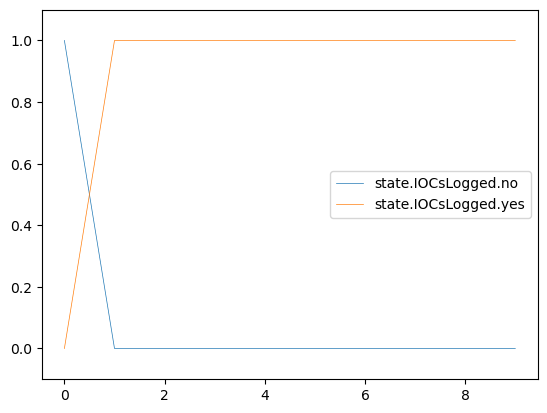

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0            Nop   
2                    0.0                     1.0            Nop   
3                    0.0                     1.0            Nop   
4                    0.0                     1.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                       file_write  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

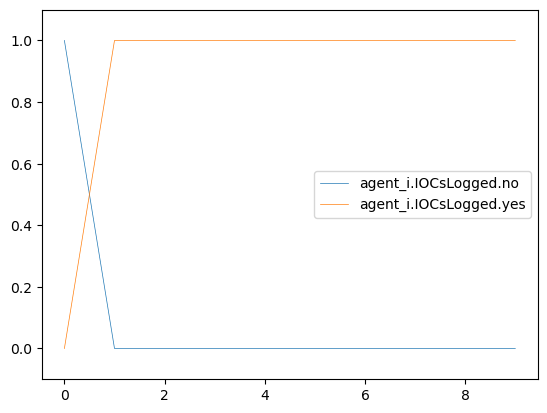

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.142857                0.857143           Exit   
2               0.142857                0.857143            Nop   
3               0.142857                0.857143            Nop   
4               0.142857                0.857143            Nop   
5               0.142857                0.857143            Nop   
6               0.142857                0.857143            Nop   
7               0.142857                0.857143            Nop   
8               0.142857                0.857143            Nop   
9               0.142857                0.857143            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                            auth                         none   
3            Nop                          denied                   user_files   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                         none   
7            Nop                          denied                         none   
8            Nop                            auth                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

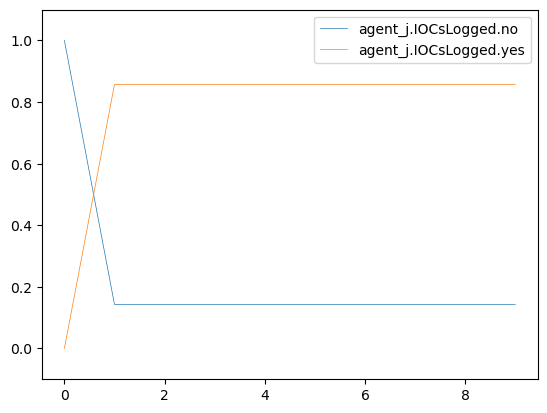

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs   EnumAccounts
1                   0.0                    1.0            Nop           Exit
2                   0.0                    1.0            Nop            Nop
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

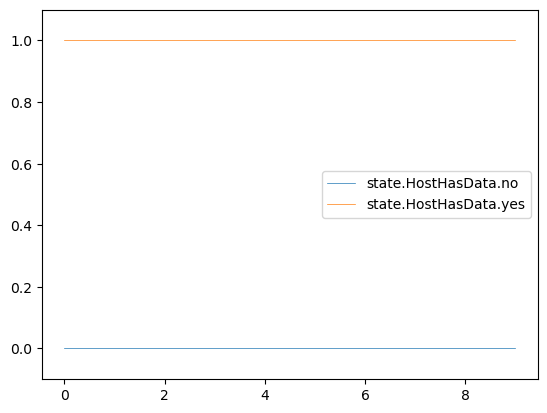

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                       file_write  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

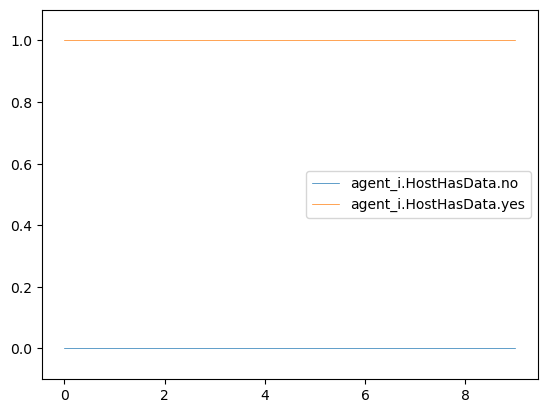

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5           Exit   
2                     0.5                      0.5            Nop   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1            Nop                          denied                   user_files   
2            Nop                            auth                         none   
3            Nop                          denied                   user_files   
4            Nop                            auth                   user_files   
5            Nop                          denied                         none   
6            Nop                            auth                         none   
7            Nop                          denied                         none   
8            Nop                            auth                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

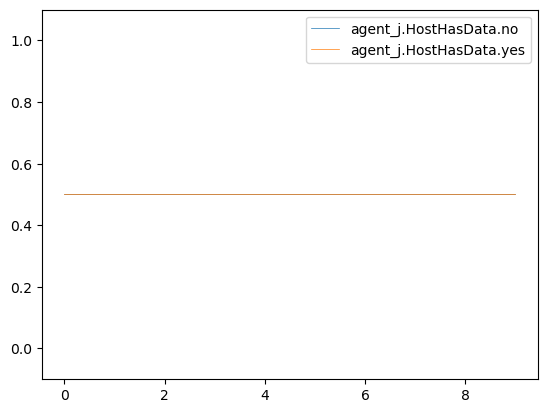

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs   EnumAccounts
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

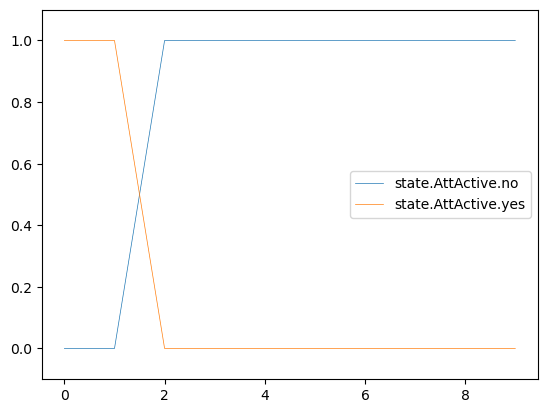

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000           1.000000e+00        LogIOCs   EnumAccounts   
1              0.000000           1.000000e+00            Nop           Exit   
2              0.994261           5.738881e-03            Nop            Nop   
3              0.990996           9.003859e-03            Nop            Nop   
4              0.995048           4.952123e-03            Nop            Nop   
5              0.999871           1.287259e-04            Nop            Nop   
6              0.999999           9.608525e-07            Nop            Nop   
7              1.000000           0.000000e+00            Nop            Nop   
8              1.000000           0.000000e+00            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                        file_enum  
3                       file_write  
4                             none  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                             none

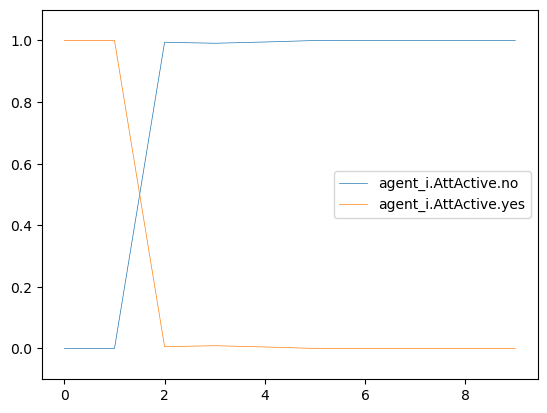

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0   EnumAccounts        LogIOCs   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                   user_files   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                         none   
7                          denied                         none   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

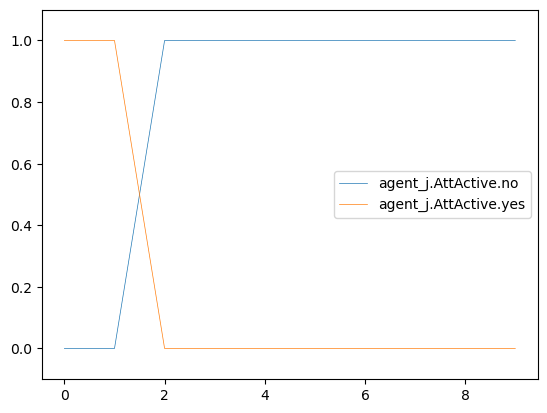

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                       file_write
2                               1.0                             none
3                               1.0                   login_activity
4                               1.0                             none
5                               1.0                        file_enum
6                               1.0                   login_activity
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

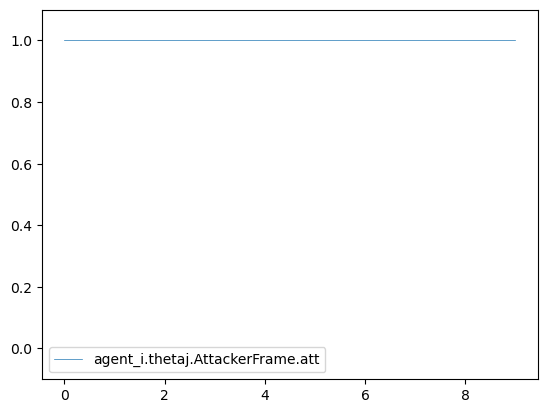

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.904762                        0.095238   
3                         0.904762                        0.095238   
4                         0.904762                        0.095238   
5                         0.904762                        0.095238   
6                         0.904762                        0.095238   
7                         0.904762                        0.095238   
8                         0.904762                        0.095238   
9                         0.904762                        0.095238   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                         none   
3                          denied                         none   
4                            auth                   user_files   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                            auth                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

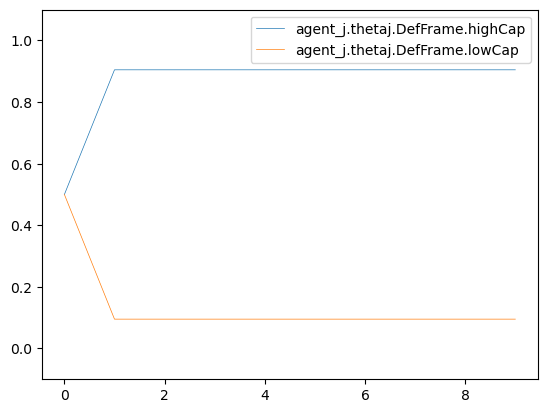

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs   EnumAccounts
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

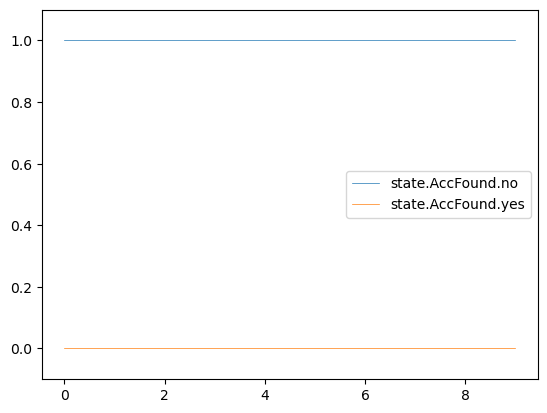

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0        LogIOCs   EnumAccounts   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                       file_write  
2                             none  
3                   login_activity  
4                             none  
5                        file_enum  
6                   login_activity  
7                             none  
8                             none  
9                             none

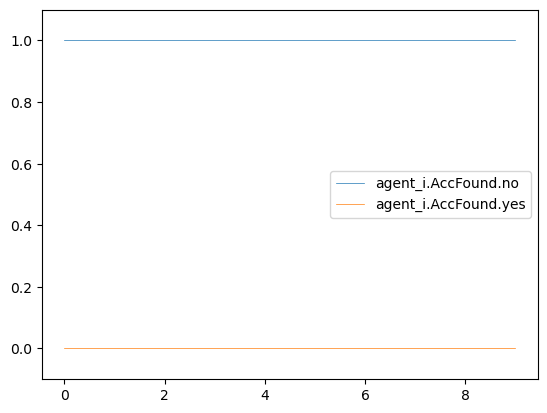

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000   EnumAccounts        LogIOCs   
1             0.943548              0.056452           Exit            Nop   
2             0.943548              0.056452            Nop            Nop   
3             0.943548              0.056452            Nop            Nop   
4             0.943548              0.056452            Nop            Nop   
5             0.943548              0.056452            Nop            Nop   
6             0.943548              0.056452            Nop            Nop   
7             0.943548              0.056452            Nop            Nop   
8             0.943548              0.056452            Nop            Nop   
9             0.943548              0.056452            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                         none   
3                          denied                         none   
4                            auth                   user_files   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                            auth                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

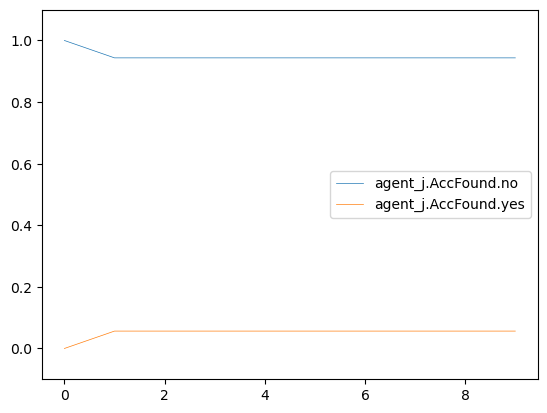

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs   EnumAccounts
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

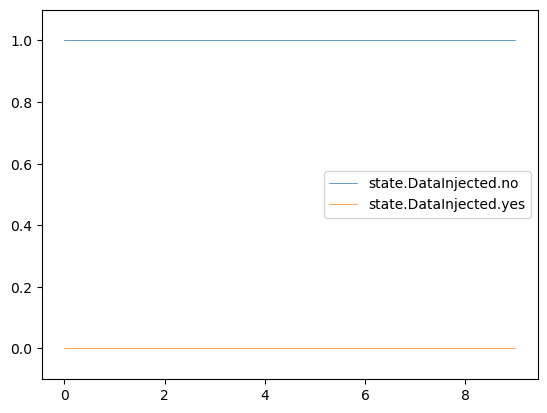

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

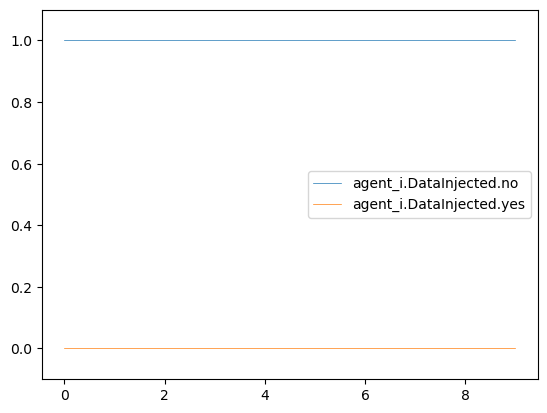

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1            Nop                          denied                         none   
2            Nop                          denied                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                   user_files   
6            Nop                            auth                         none   
7            Nop                          denied                   user_files   
8            Nop                            auth                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

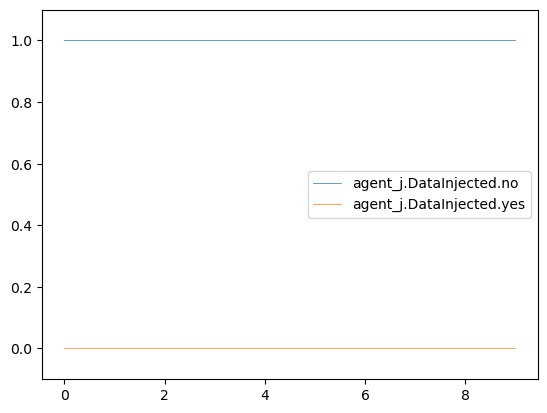

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs   EnumAccounts
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

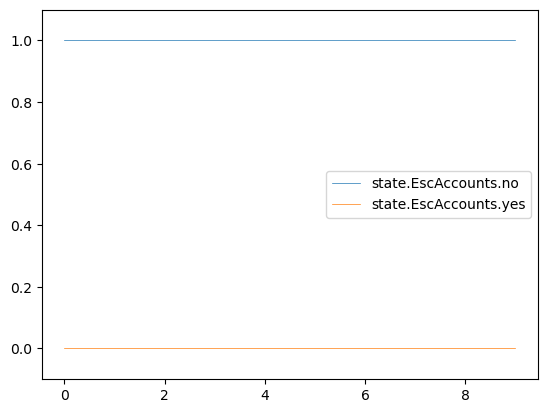

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

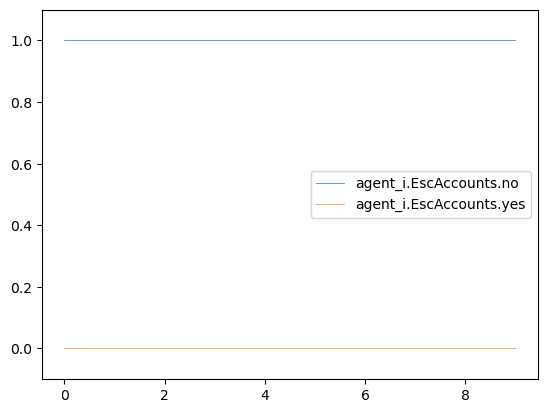

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194           Exit   
2                0.725806                 0.274194            Nop   
3                0.725806                 0.274194            Nop   
4                0.725806                 0.274194            Nop   
5                0.725806                 0.274194            Nop   
6                0.725806                 0.274194            Nop   
7                0.725806                 0.274194            Nop   
8                0.725806                 0.274194            Nop   
9                0.725806                 0.274194            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1            Nop                          denied                         none   
2            Nop                          denied                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                   user_files   
6            Nop                            auth                         none   
7            Nop                          denied                   user_files   
8            Nop                            auth                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

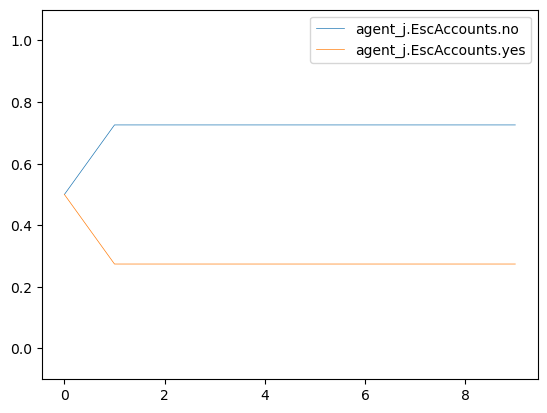

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs   EnumAccounts  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

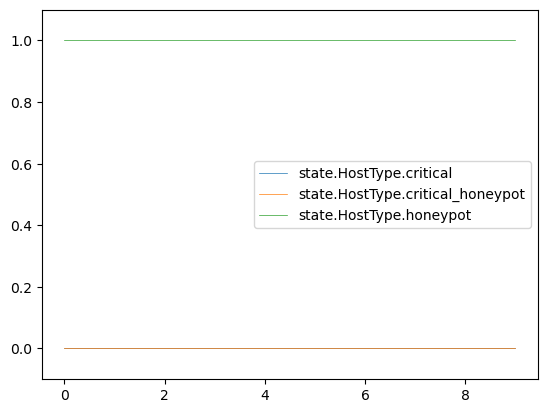

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs   EnumAccounts   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                       file_write  
2                             none  
3                   login_activity  
4                             none  
5                        file_enum  
6                   login_activity  
7                             none  
8                             none  
9                             none

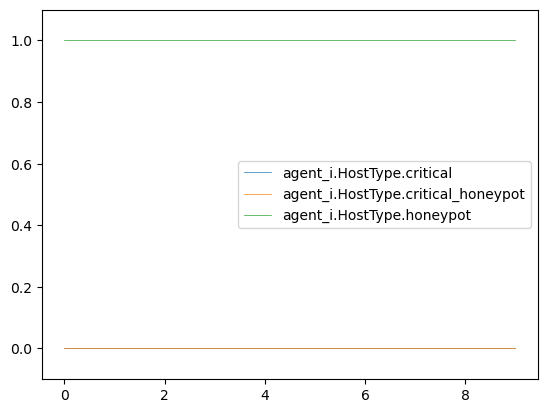

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.0   EnumAccounts        LogIOCs   
1                        0.0           Exit            Nop   
2                        0.0            Nop            Nop   
3                        0.0            Nop            Nop   
4                        0.0            Nop            Nop   
5                        0.0            Nop            Nop   
6                        0.0            Nop            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                         none   
3                          denied                         none   
4                            auth                   user_files   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                            auth                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

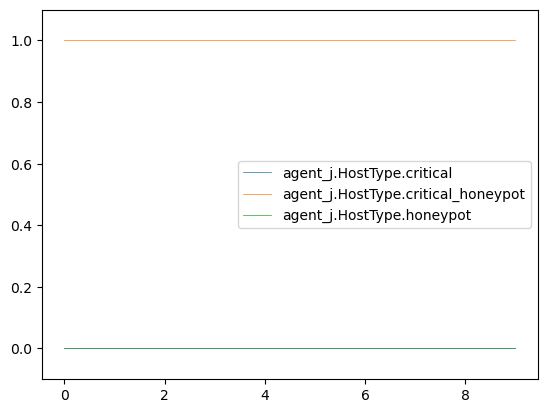

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs   EnumAccounts
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

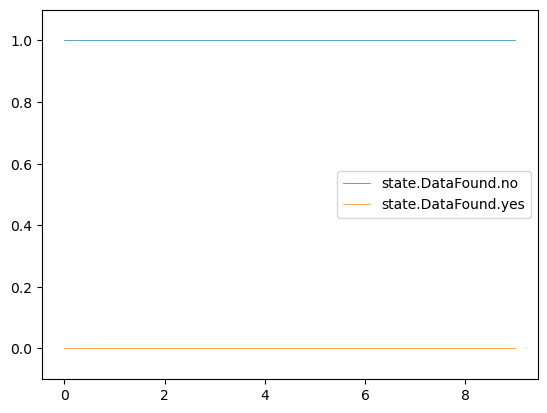

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs   EnumAccounts   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                       file_write  
2                             none  
3                   login_activity  
4                             none  
5                        file_enum  
6                   login_activity  
7                             none  
8                             none  
9                             none

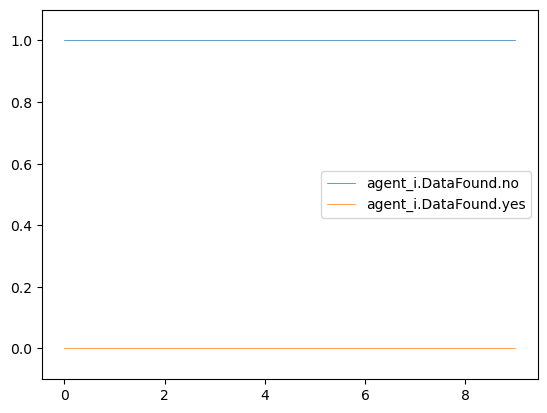

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0                   1.0                    0.0   EnumAccounts        LogIOCs   
1                   1.0                    0.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                         none   
3                          denied                         none   
4                            auth                   user_files   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                            auth                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

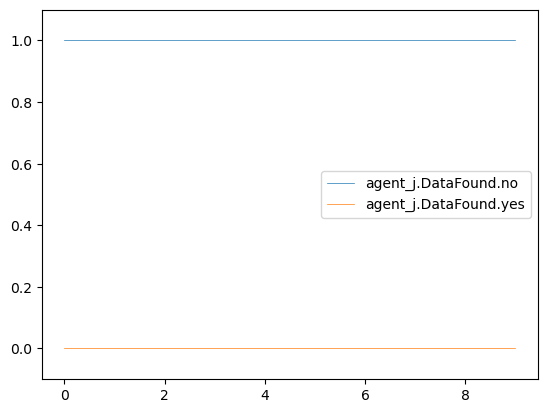

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

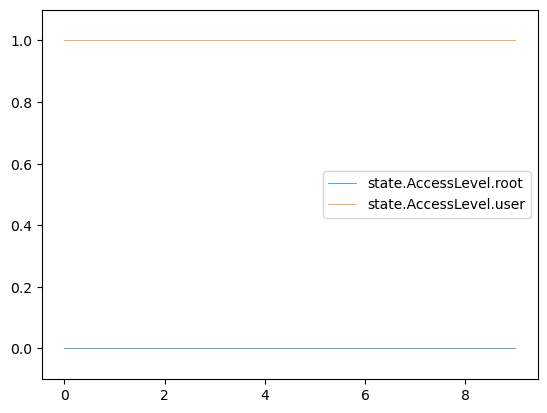

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

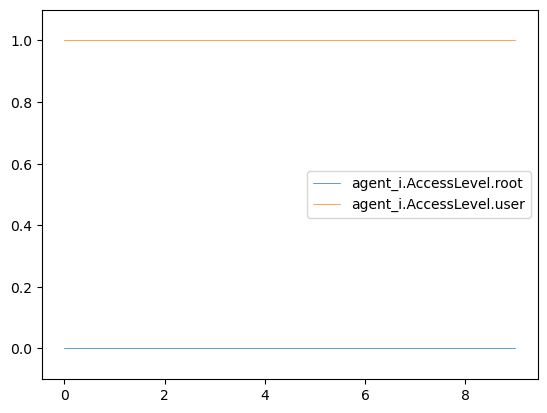

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1            Nop                          denied                         none   
2            Nop                          denied                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                   user_files   
6            Nop                            auth                         none   
7            Nop                          denied                   user_files   
8            Nop                            auth                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

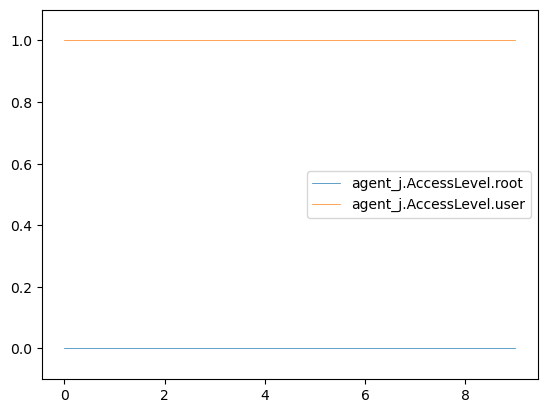

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   0.0                   1.0        LogIOCs   EnumAccounts
1                   0.0                   1.0            Nop           Exit
2                   0.0                   1.0            Nop            Nop
3                   0.0                   1.0            Nop            Nop
4                   0.0                   1.0            Nop            Nop
5                   0.0                   1.0            Nop            Nop
6                   0.0                   1.0            Nop            Nop
7                   0.0                   1.0            Nop            Nop
8                   0.0                   1.0            Nop            Nop
9                   0.0                   1.0            Nop            Nop

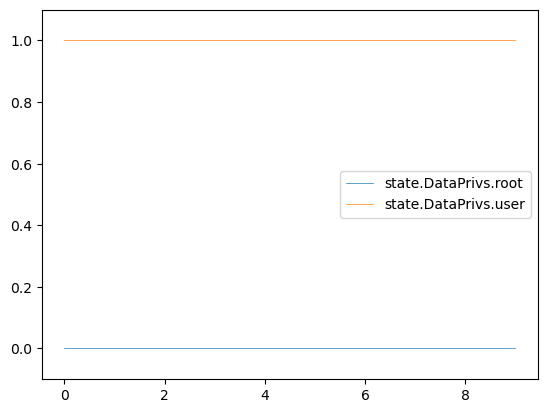

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

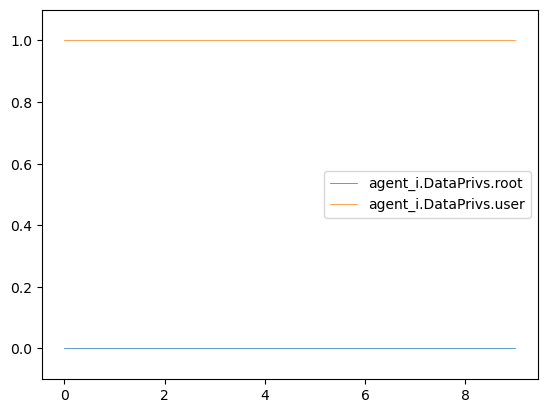

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.571429                0.428571           Exit   
2                1.000000                0.000000            Nop   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1            Nop                          denied                         none   
2            Nop                          denied                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                   user_files   
6            Nop                            auth                         none   
7            Nop                          denied                   user_files   
8            Nop                            auth                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

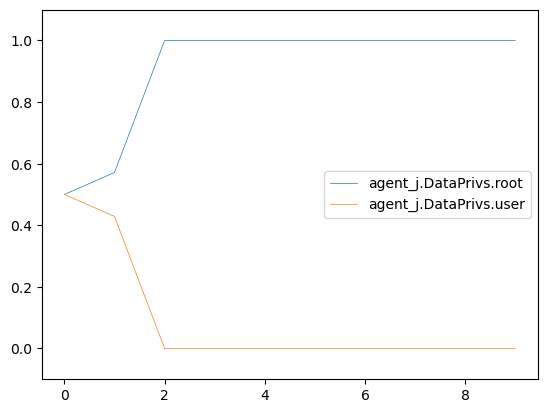

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs   EnumAccounts
1                  0.0                   1.0            Nop           Exit
2                  0.0                   1.0            Nop            Nop
3                  0.0                   1.0            Nop            Nop
4                  0.0                   1.0            Nop            Nop
5                  0.0                   1.0            Nop            Nop
6                  0.0                   1.0            Nop            Nop
7                  0.0                   1.0            Nop            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

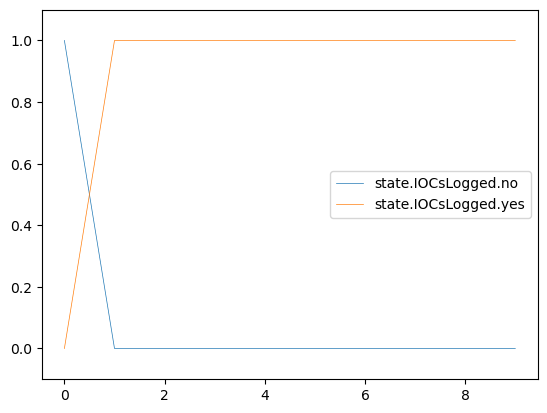

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0            Nop   
2                    0.0                     1.0            Nop   
3                    0.0                     1.0            Nop   
4                    0.0                     1.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

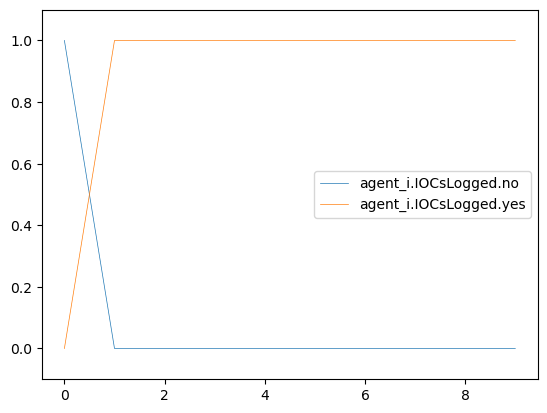

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.142857                0.857143           Exit   
2               0.142857                0.857143            Nop   
3               0.142857                0.857143            Nop   
4               0.142857                0.857143            Nop   
5               0.142857                0.857143            Nop   
6               0.142857                0.857143            Nop   
7               0.142857                0.857143            Nop   
8               0.142857                0.857143            Nop   
9               0.142857                0.857143            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1            Nop                          denied                         none   
2            Nop                          denied                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                   user_files   
6            Nop                            auth                         none   
7            Nop                          denied                   user_files   
8            Nop                            auth                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

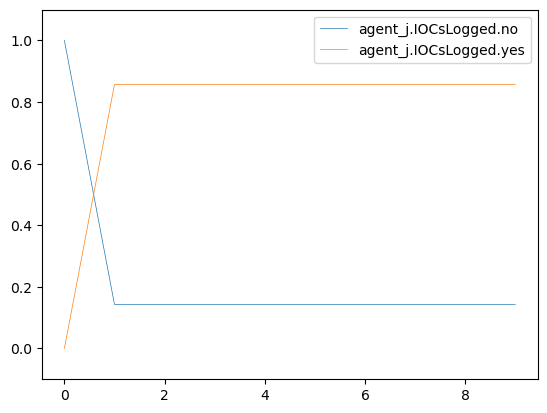

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs   EnumAccounts
1                   0.0                    1.0            Nop           Exit
2                   0.0                    1.0            Nop            Nop
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

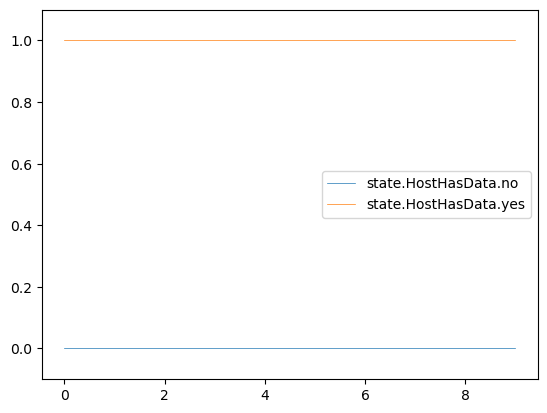

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

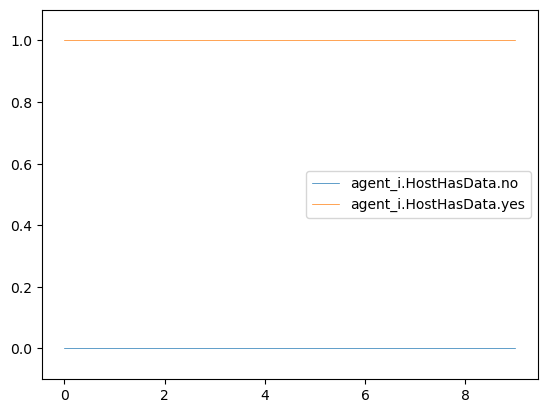

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5           Exit   
2                     0.5                      0.5            Nop   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1            Nop                          denied                         none   
2            Nop                          denied                         none   
3            Nop                          denied                         none   
4            Nop                            auth                   user_files   
5            Nop                          denied                   user_files   
6            Nop                            auth                         none   
7            Nop                          denied                   user_files   
8            Nop                            auth                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

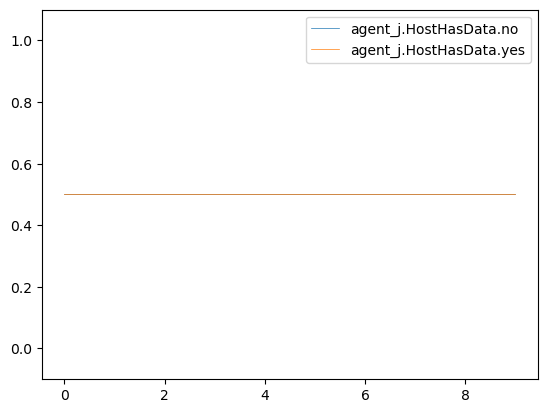

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs   EnumAccounts
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

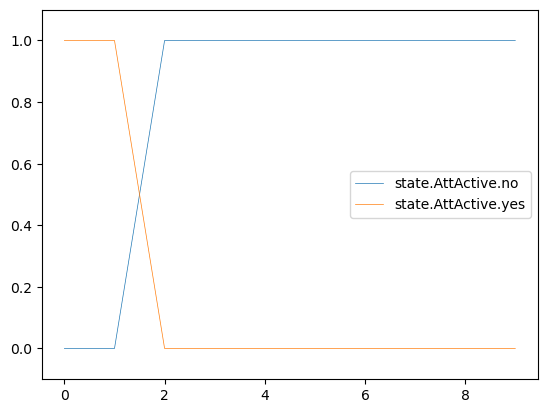

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000        LogIOCs   EnumAccounts   
1              0.000000               1.000000            Nop           Exit   
2              0.990000               0.010000            Nop            Nop   
3              0.998704               0.001296            Nop            Nop   
4              0.998511               0.001489            Nop            Nop   
5              0.999920               0.000080            Nop            Nop   
6              0.999993               0.000007            Nop            Nop   
7              1.000000               0.000000            Nop            Nop   
8              1.000000               0.000000            Nop            Nop   
9              1.000000               0.000000            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                       file_write  
2                             none  
3                   login_activity  
4                             none  
5                        file_enum  
6                   login_activity  
7                             none  
8                             none  
9                             none

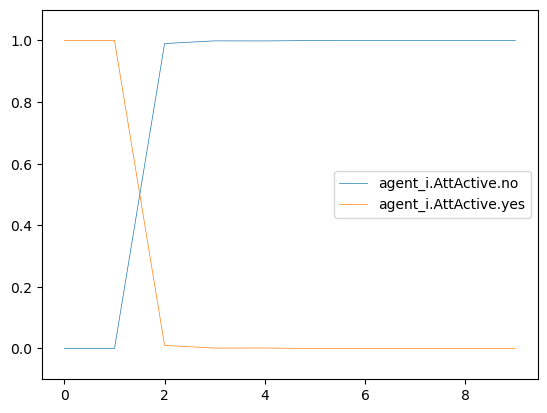

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0   EnumAccounts        LogIOCs   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                         none   
3                          denied                         none   
4                            auth                   user_files   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                            auth                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

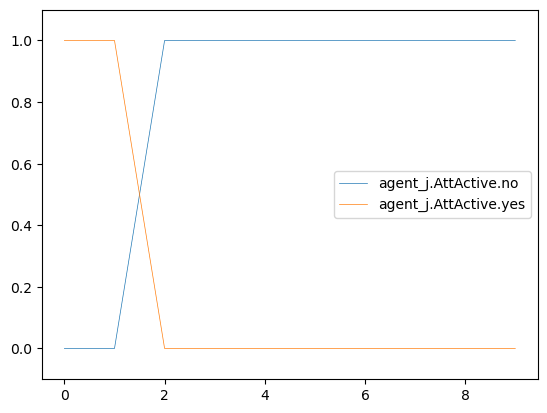

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    